# Построение сетей

In [41]:
import glob
import numpy as np
import paths

def average_network(folders_in, files_out):
    """
    Создание усредненной сети.
    
    :param folders_in: Папки, где хранятся сети.
    :param files_out: Файлы усредненных сетей.
    :return: 
    """
    states_0 = ['0bk', 'win', 'l', 'story', 'rnd', 'relation', 'neut']
    states_1 = ['2bk', 'loss', 'r', 'math', 'mental', 'match', 'fear']
    
    files = sorted(glob.glob(f'{folders_in[0]}/*') + glob.glob(f'{folders_in[1]}/*') +
                   glob.glob(f'{folders_in[2]}/*') + glob.glob(f'{folders_in[3]}/*'))
    files_0 = [file for file in files if any('_' + sub + '.npy' in file.split('/')[-1] for sub in states_0)]
    files_1 = [file for file in files if any('_' + sub + '.npy' in file.split('/')[-1] for sub in states_1)]

    A_0 = np.mean([np.load(file) for file in files_0], axis=0)
    A_1 = np.mean([np.load(file) for file in files_1], axis=0)

    np.save(files_out[0], A_0)
    np.save(files_out[1], A_1)

In [3]:
average_network(paths.folders_mean_ensemble_edges_test_wm, paths.average_network_wm)
average_network(paths.folders_pca_ensemble_edges_test_gambling, paths.average_network_gambling)
average_network(paths.folders_pca_ensemble_edges_test_motor, paths.average_network_motor)
average_network(paths.folders_pca_ensemble_edges_test_language, paths.average_network_language)
average_network(paths.folders_pca_ensemble_edges_test_social, paths.average_network_social)
average_network(paths.folders_pca_ensemble_edges_test_relational, paths.average_network_relational)
average_network(paths.folders_pca_ensemble_edges_test_emotion, paths.average_network_emotion)

In [8]:
# Проверим средний вес ребер сетей
print(np.mean(np.load(paths.average_network_wm[0])), np.mean(np.load(paths.average_network_wm[1])))
print(np.mean(np.load(paths.average_network_gambling[0])), np.mean(np.load(paths.average_network_gambling[1])))
print(np.mean(np.load(paths.average_network_motor[0])), np.mean(np.load(paths.average_network_motor[1])))
print(np.mean(np.load(paths.average_network_language[0])), np.mean(np.load(paths.average_network_language[1])))
print(np.mean(np.load(paths.average_network_social[0])), np.mean(np.load(paths.average_network_social[1])))
print(np.mean(np.load(paths.average_network_relational[0])), np.mean(np.load(paths.average_network_relational[1])))
print(np.mean(np.load(paths.average_network_emotion[0])), np.mean(np.load(paths.average_network_emotion[1])))

-0.22190429865818145 0.2219857863191833
-0.10027654142658776 0.09921072798640121
-0.26396086720782747 0.2633400991088735
-0.4430803067763874 0.4440456337671121
-0.20582439728027807 0.20582292912049088
-0.22488466799740423 0.2239682677137376
-0.07763506409183514 0.07836254356031457


# Исследование глобальных характеристик сетей

Исследуем распределение весов ребер.

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import paths

def weight_distribution(file0, file1, quantiles, bins=75, shift=False):
    """
    Изображение распределений весов ребер двух ансамблевых графов.
    
    :param file0: Файл графа первого состояния.
    :param file1: Файл графа второго состояния.
    :param quantiles: Квантили, которые нужно изобразить. 
    :param bins: Число столбцов в гистограмме.
    :param shift: Нужно ли делать сдвиг весов.
    :return: 
    """
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    if shift:
        matrices = [(np.load(file0) + 1) / 2, (np.load(file1) + 1) / 2]
    else:
        matrices = [np.load(file0), np.load(file1)]
    titles = [file0.split('/')[-1][:-4], file1.split('/')[-1][:-4]]
    
    for ax, mat, title, qs in zip(axes, matrices, titles, [1 - np.array(quantiles), np.array(quantiles)]):
        # Заменяем диагональные элементы на NaN
        np.fill_diagonal(mat, np.nan)
        # Получаем веса в виде одномерного массива и отфильтровываем NaN
        weights = mat.flatten()
        weights = weights[~np.isnan(weights)]
        
        # Вычисляем заданный квантиль
        q_values = np.quantile(weights, qs)
        
        # Строим гистограмму распределения весов
        ax.hist(weights, bins=bins, alpha=0.7, color='skyblue', edgecolor='black')
        for q, q_value in zip(qs, q_values):
            ax.axvline(q_value, color='red', linestyle='dashed', linewidth=1.5,
                       label=f'Quantile {q:.2f}: {q_value:.3f}')

        ax.set_xlabel('Weight')
        ax.set_ylabel('Frequency')
        ax.set_title(title)
        ax.legend()
    
    plt.tight_layout()
    plt.show()

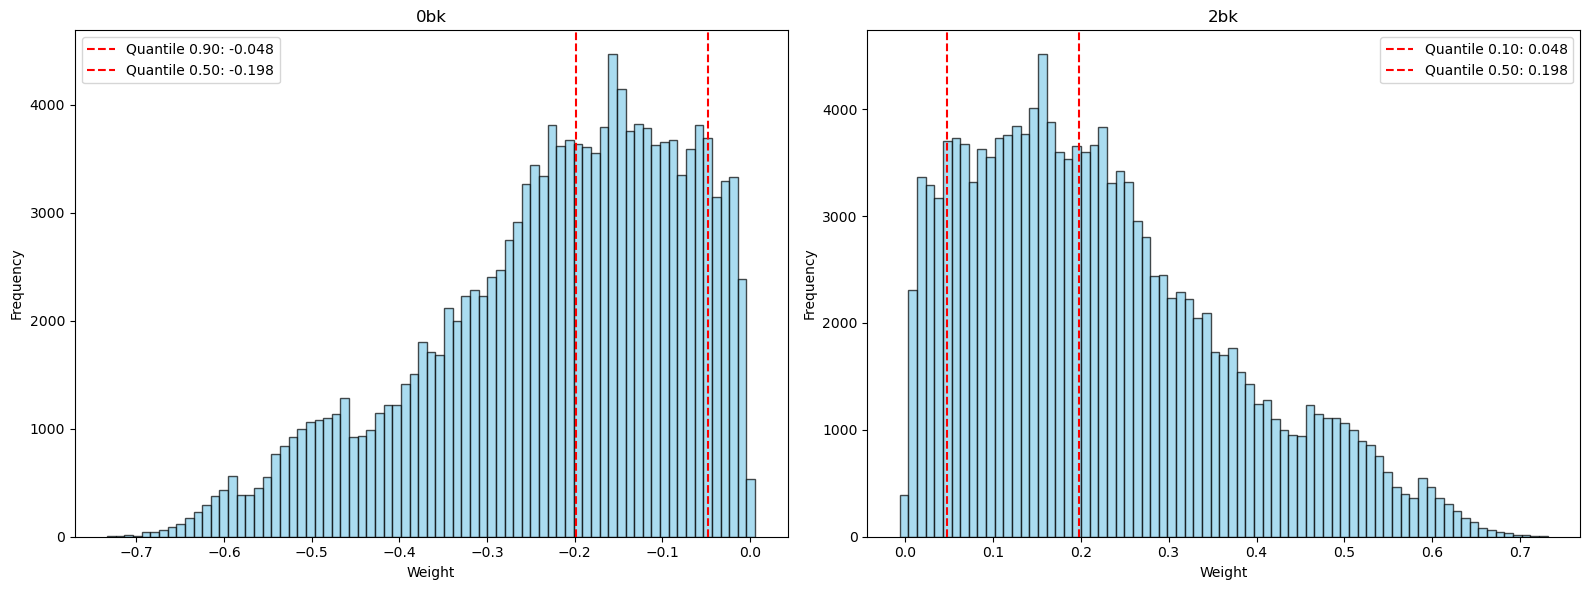

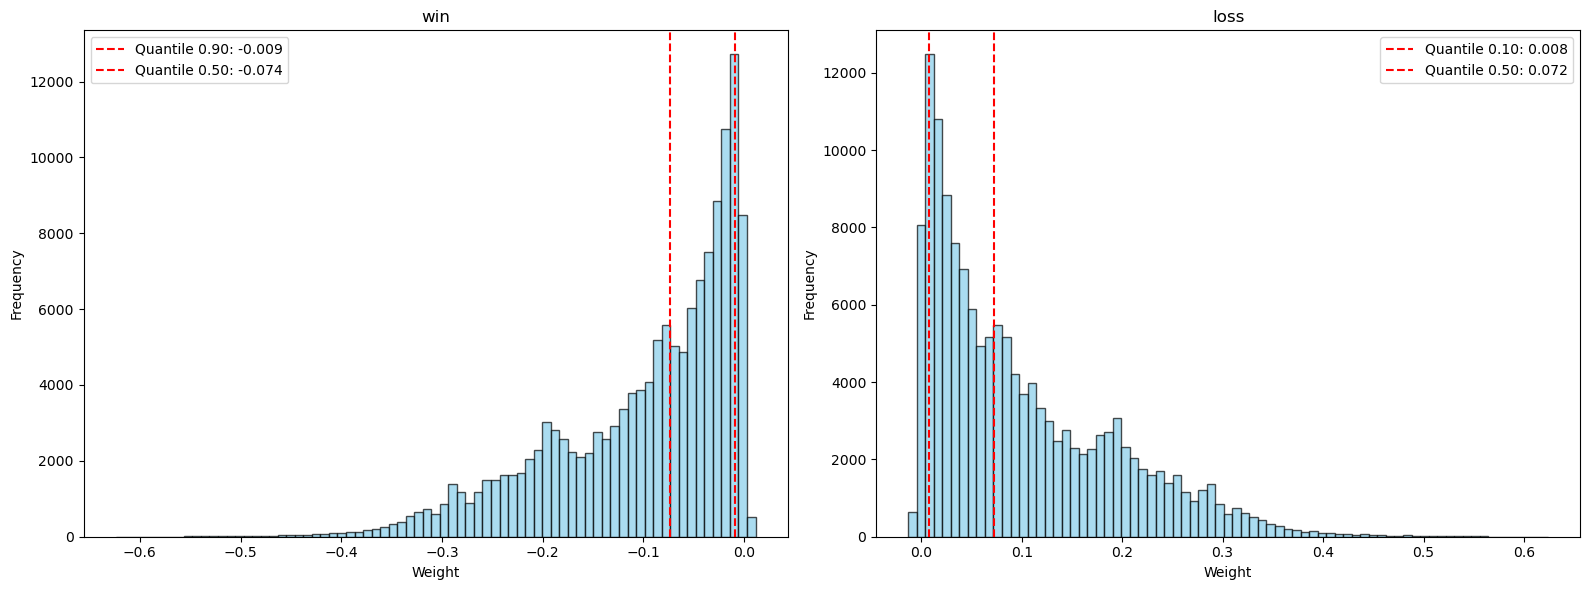

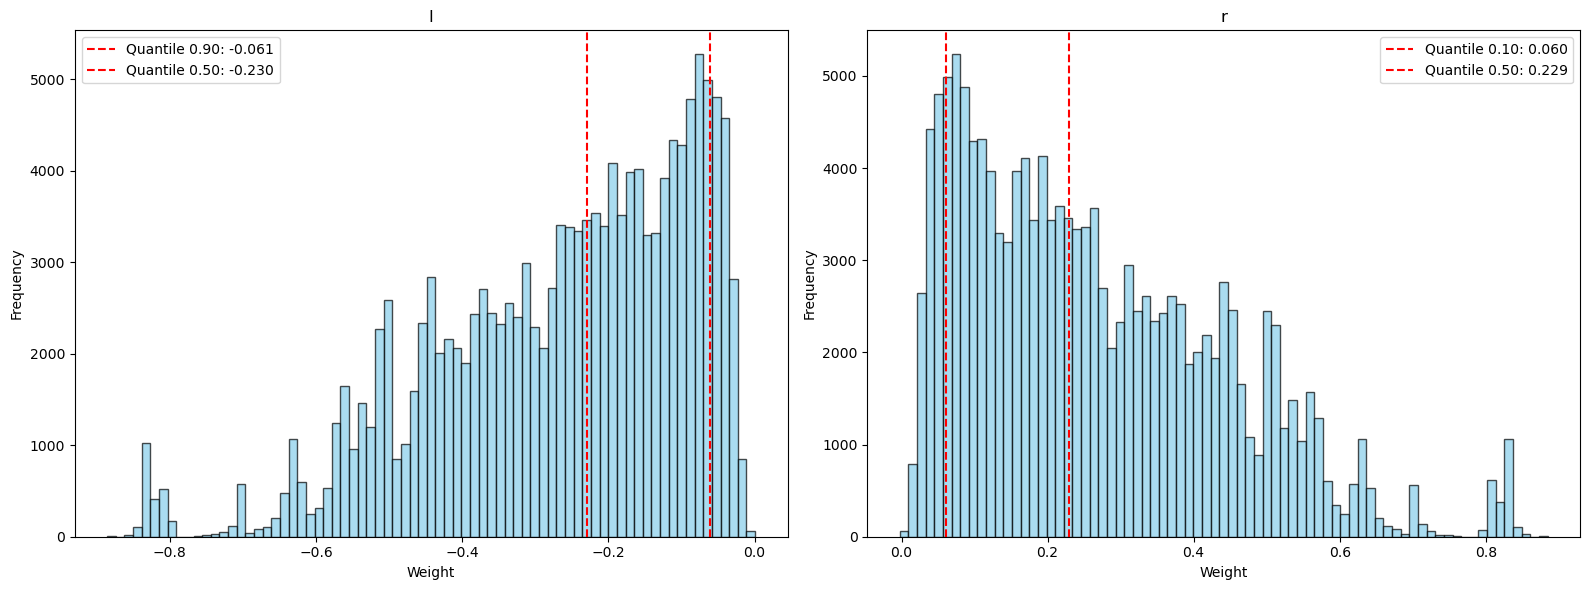

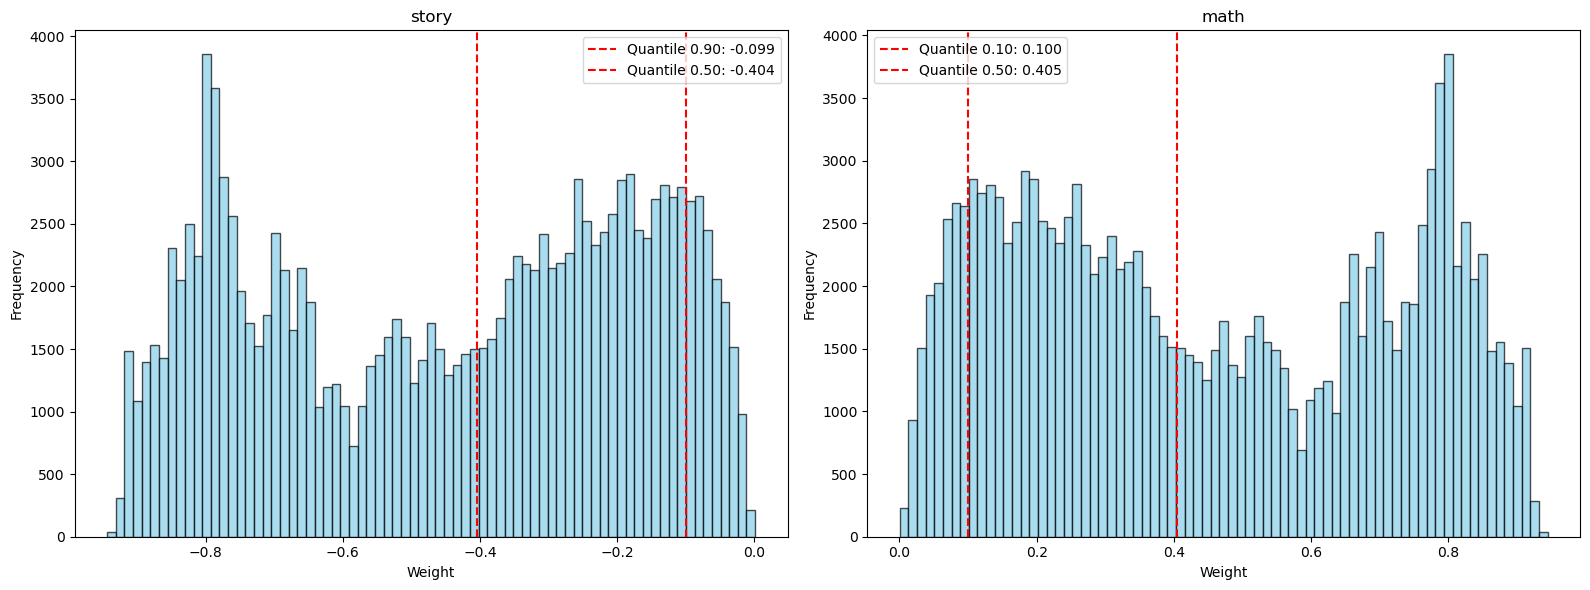

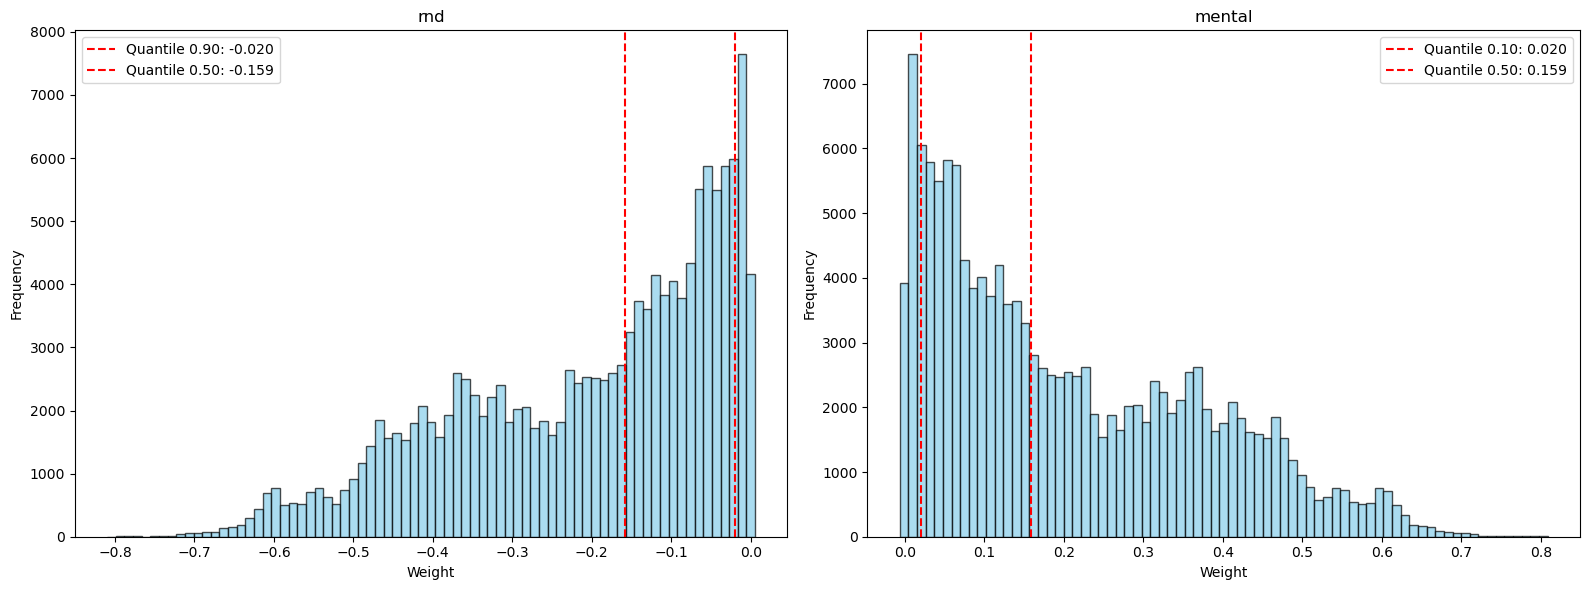

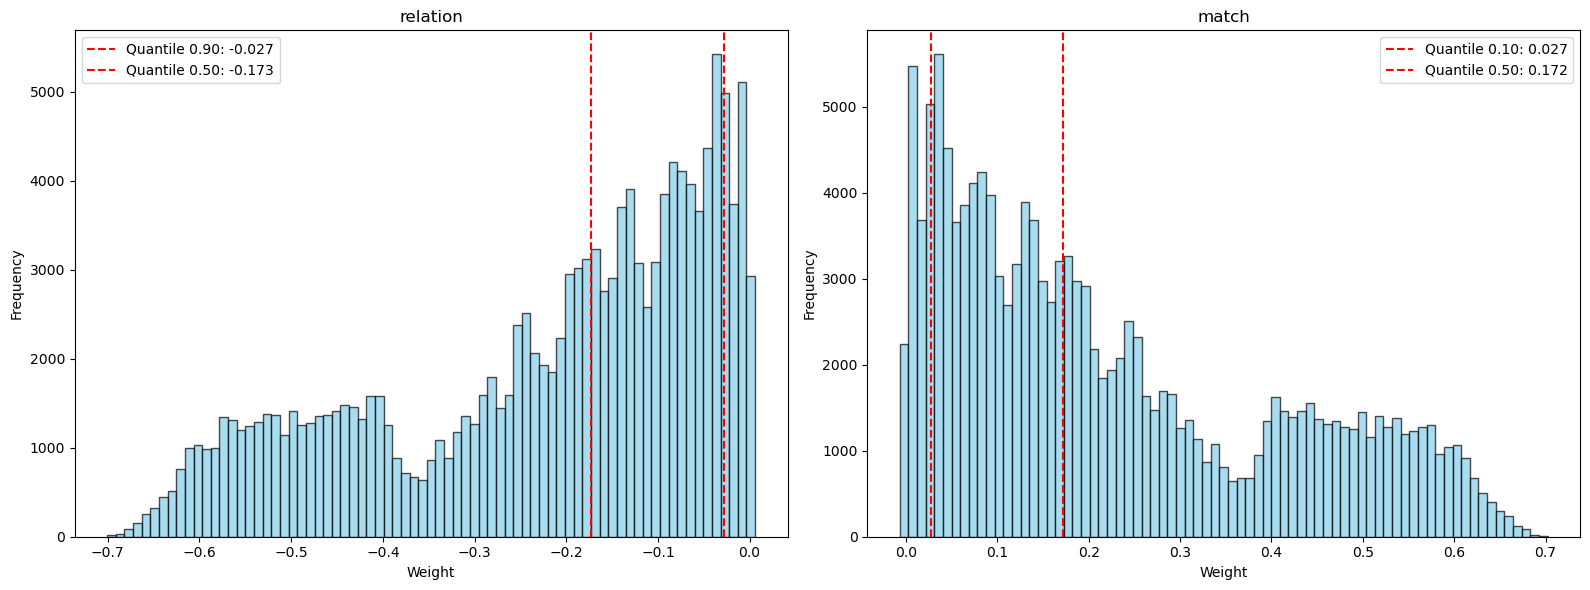

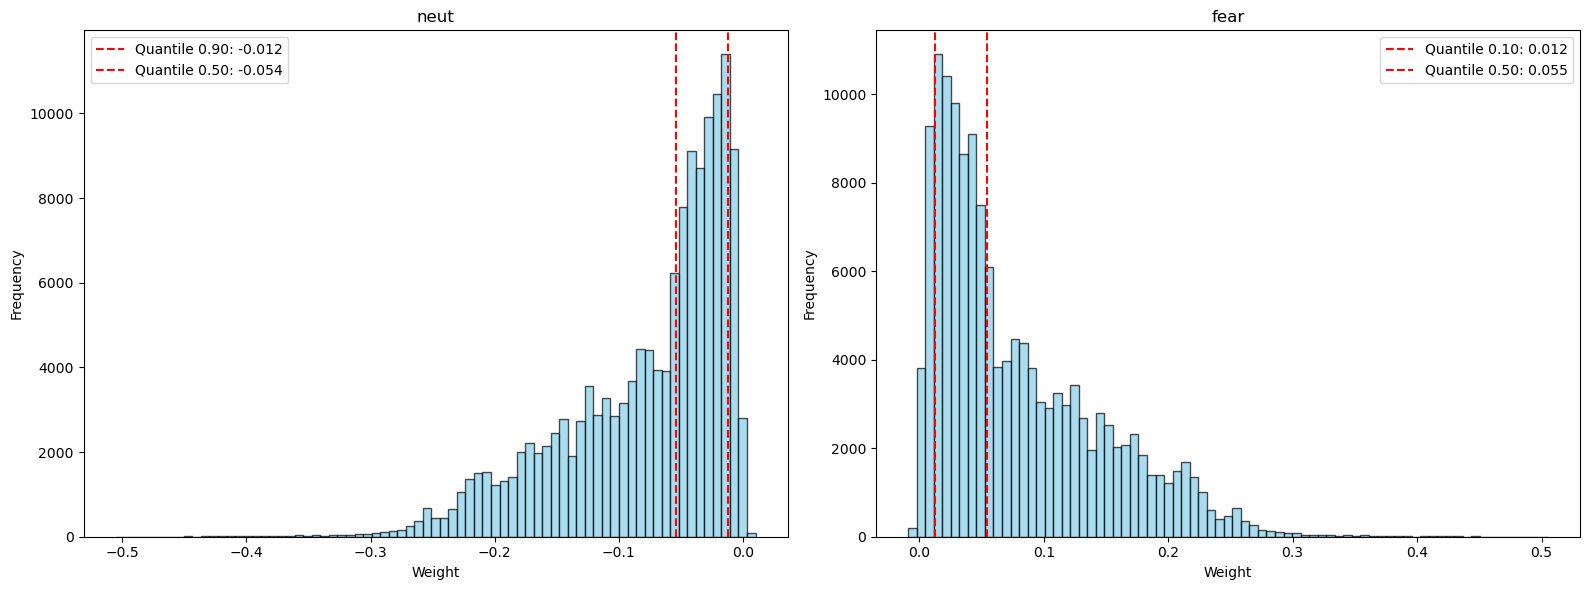

In [60]:
quantiles = [0.1, 0.5]
weight_distribution(paths.average_network_wm[0], paths.average_network_wm[1], quantiles)
weight_distribution(paths.average_network_gambling[0], paths.average_network_gambling[1], quantiles)
weight_distribution(paths.average_network_motor[0], paths.average_network_motor[1], quantiles)
weight_distribution(paths.average_network_language[0], paths.average_network_language[1], quantiles)
weight_distribution(paths.average_network_social[0], paths.average_network_social[1], quantiles)
weight_distribution(paths.average_network_relational[0], paths.average_network_relational[1], quantiles)
weight_distribution(paths.average_network_emotion[0], paths.average_network_emotion[1], quantiles)

Во-первых, я решил пока продолжить исследование графов без фильтрации. Во-вторых, чтобы не переизобретать велосипед я иногда буду сдвигать веса ребер от диапазона [-1, 1], до [0, 1], тогда не будет проблем с некоторыми сетевыми метриками.  

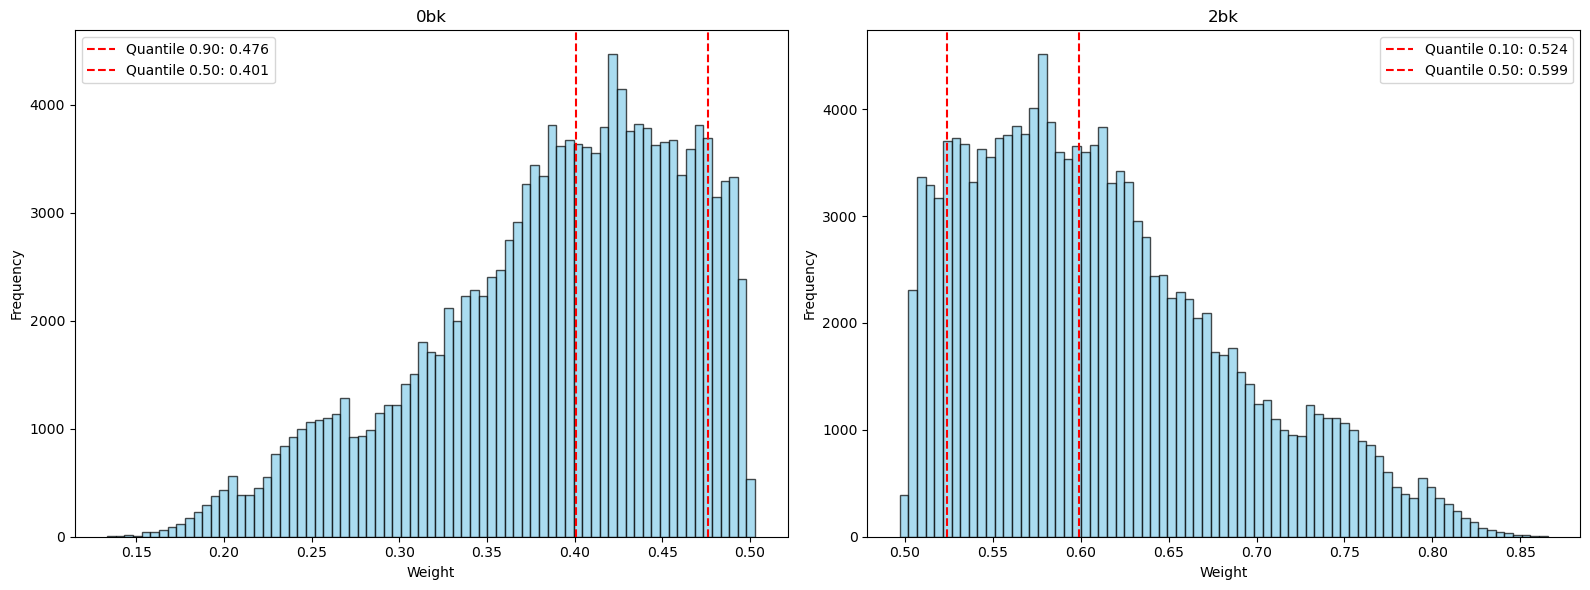

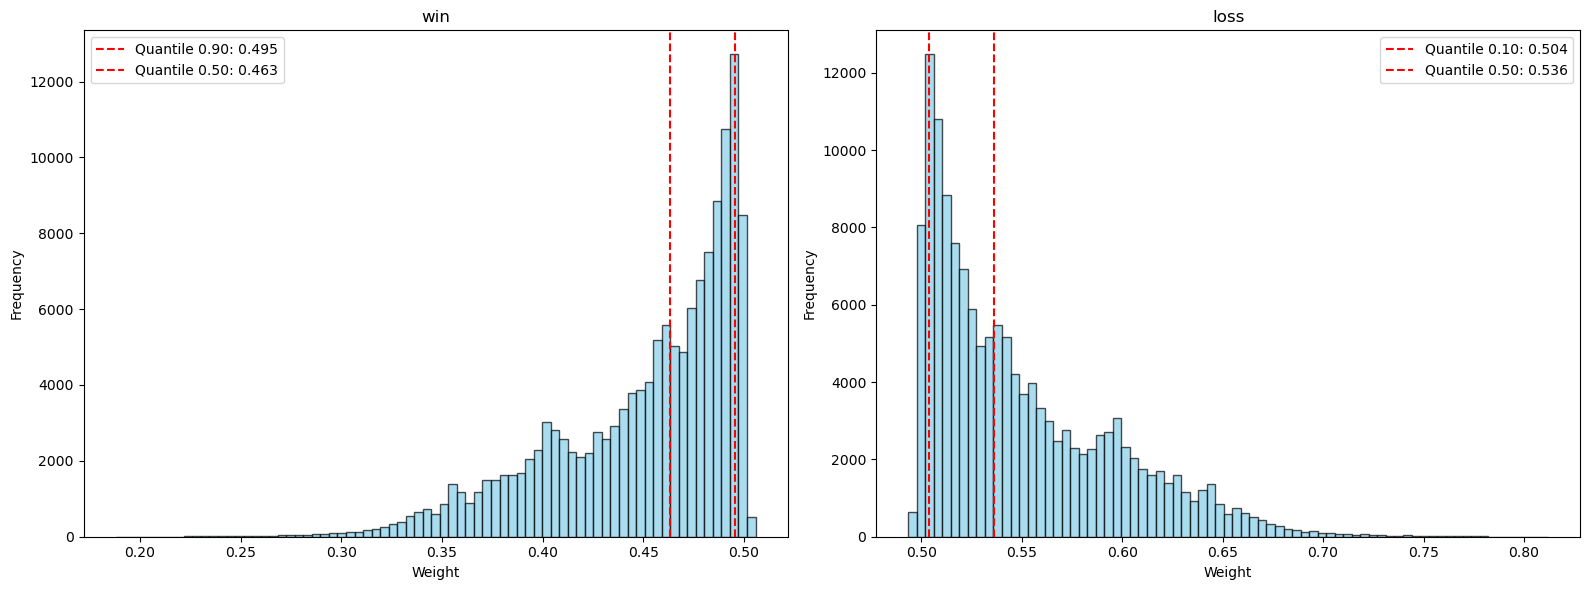

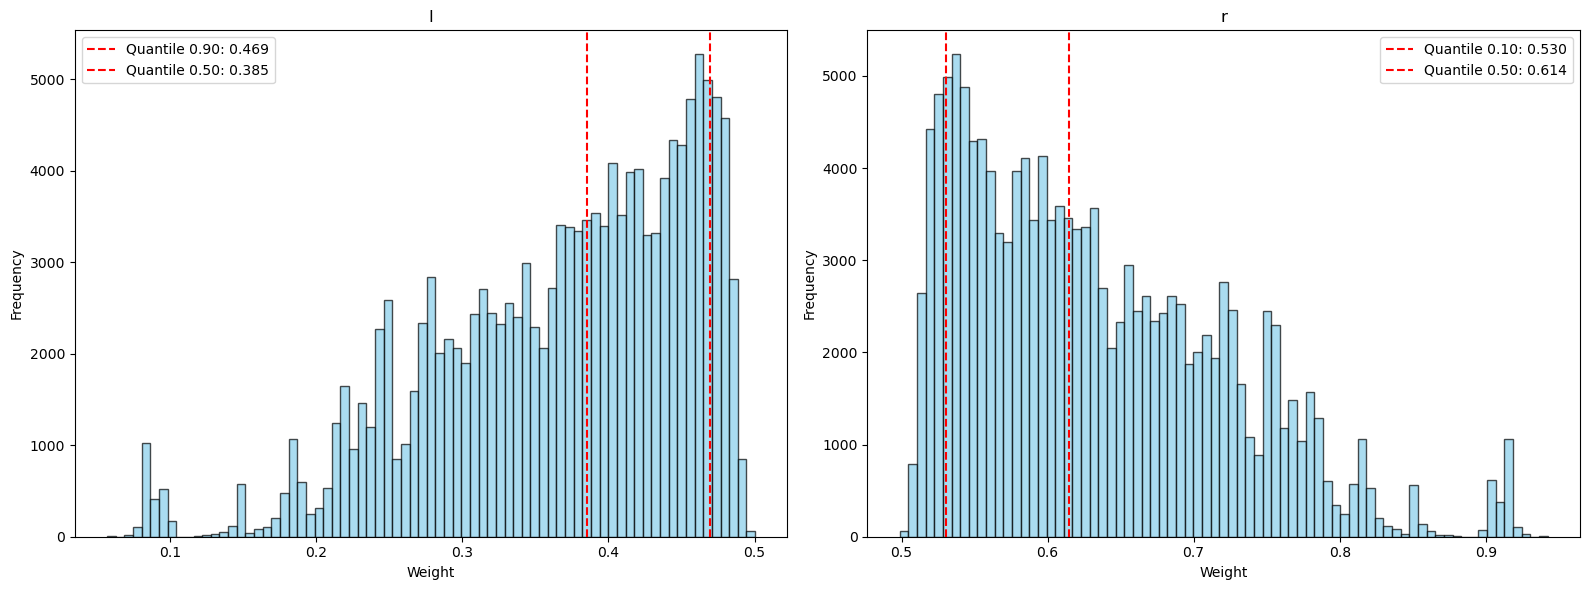

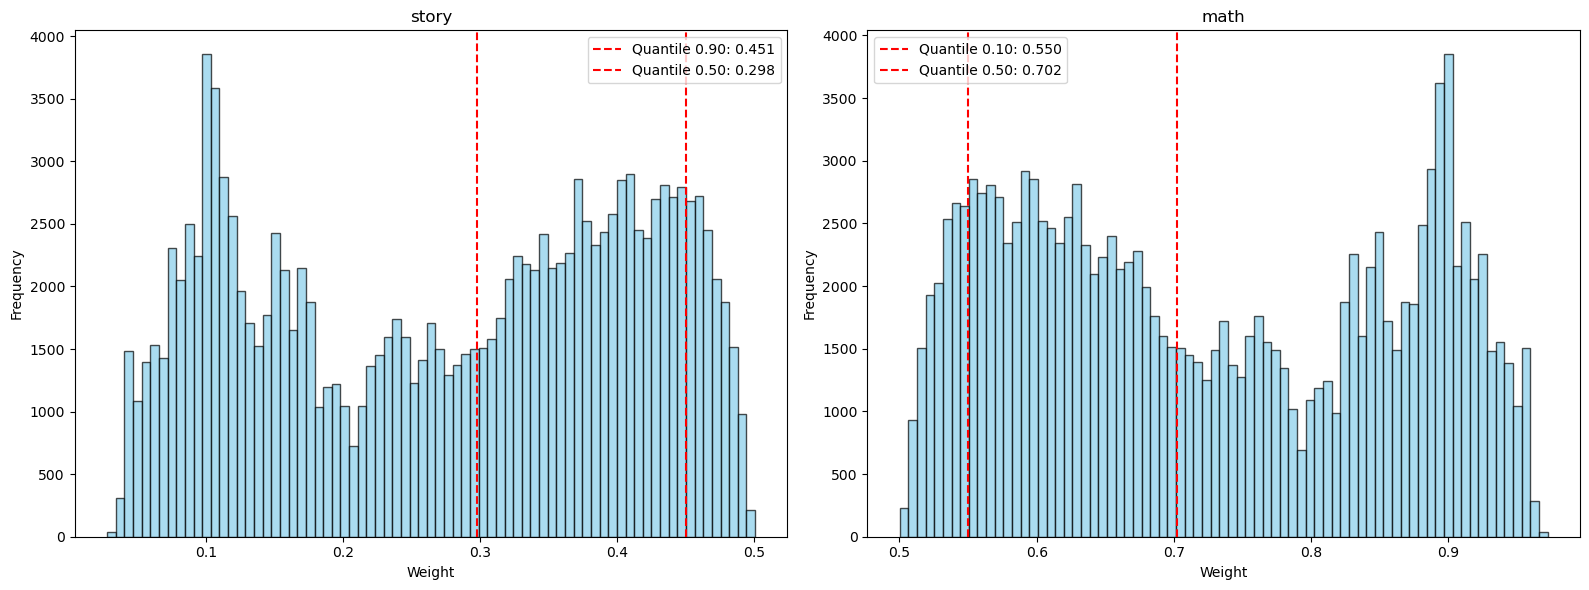

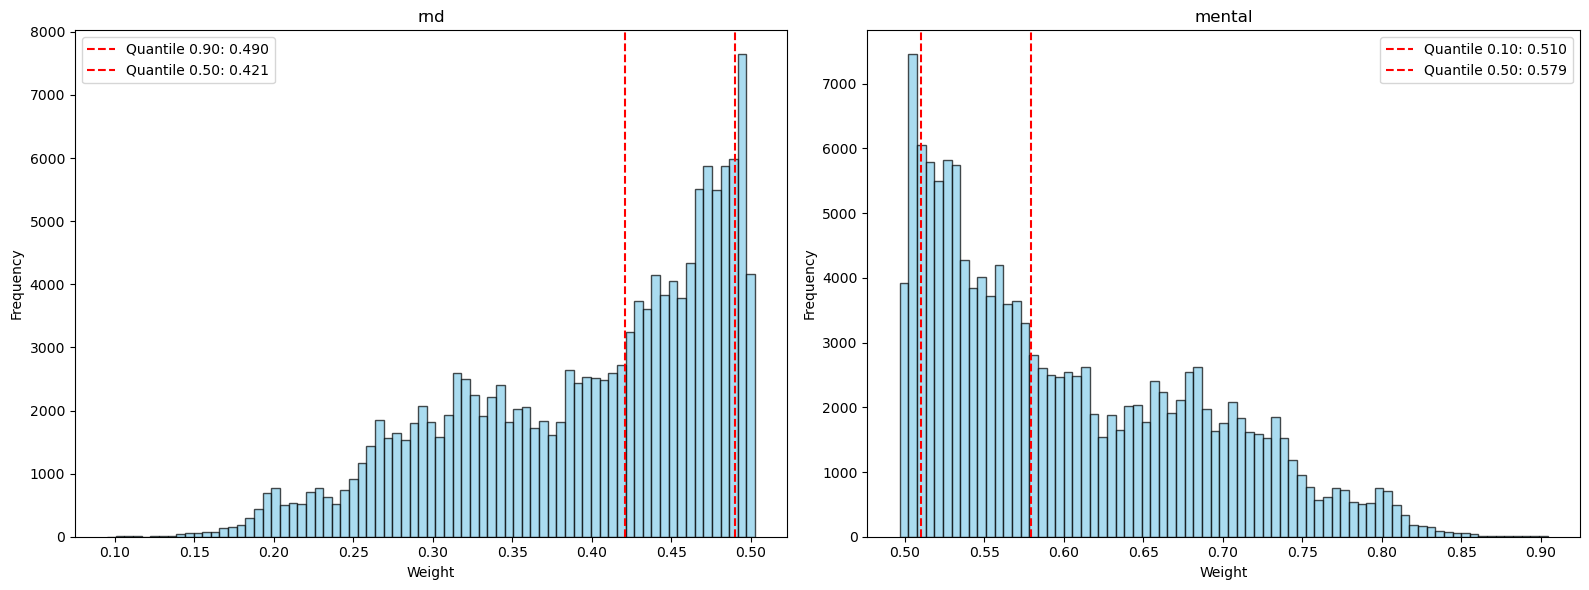

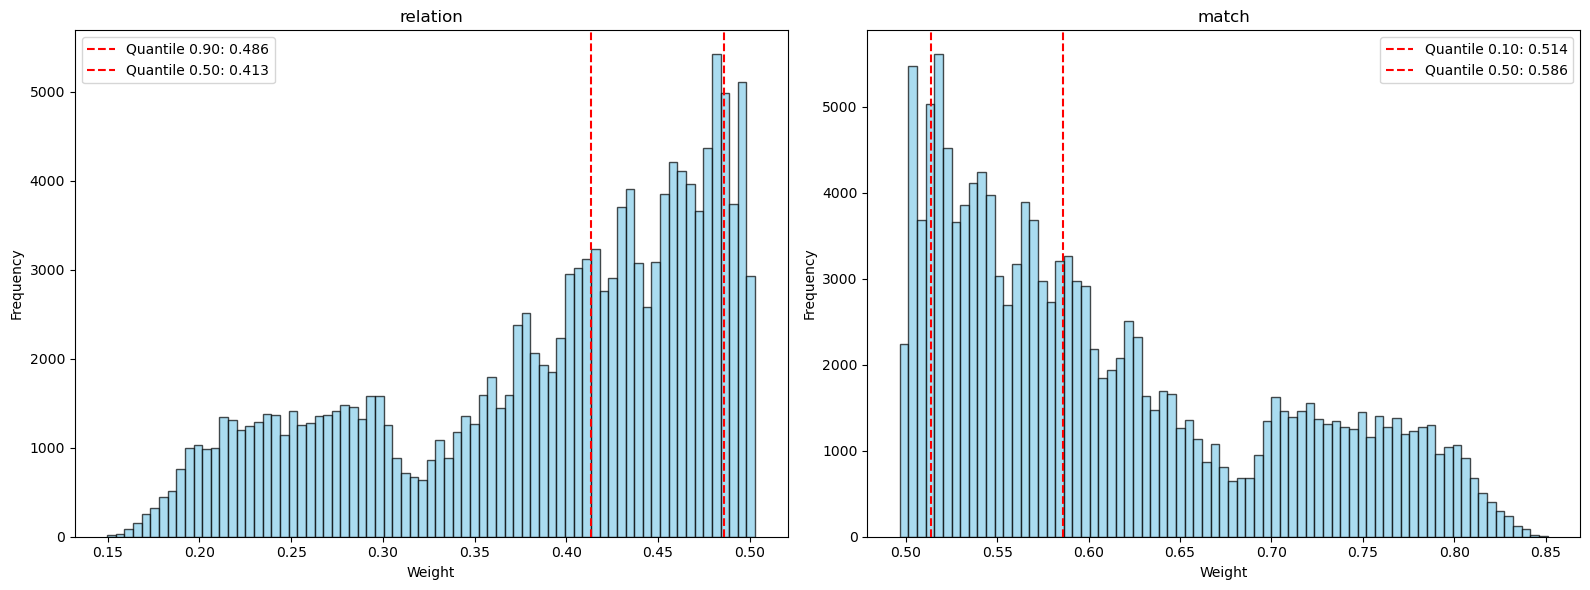

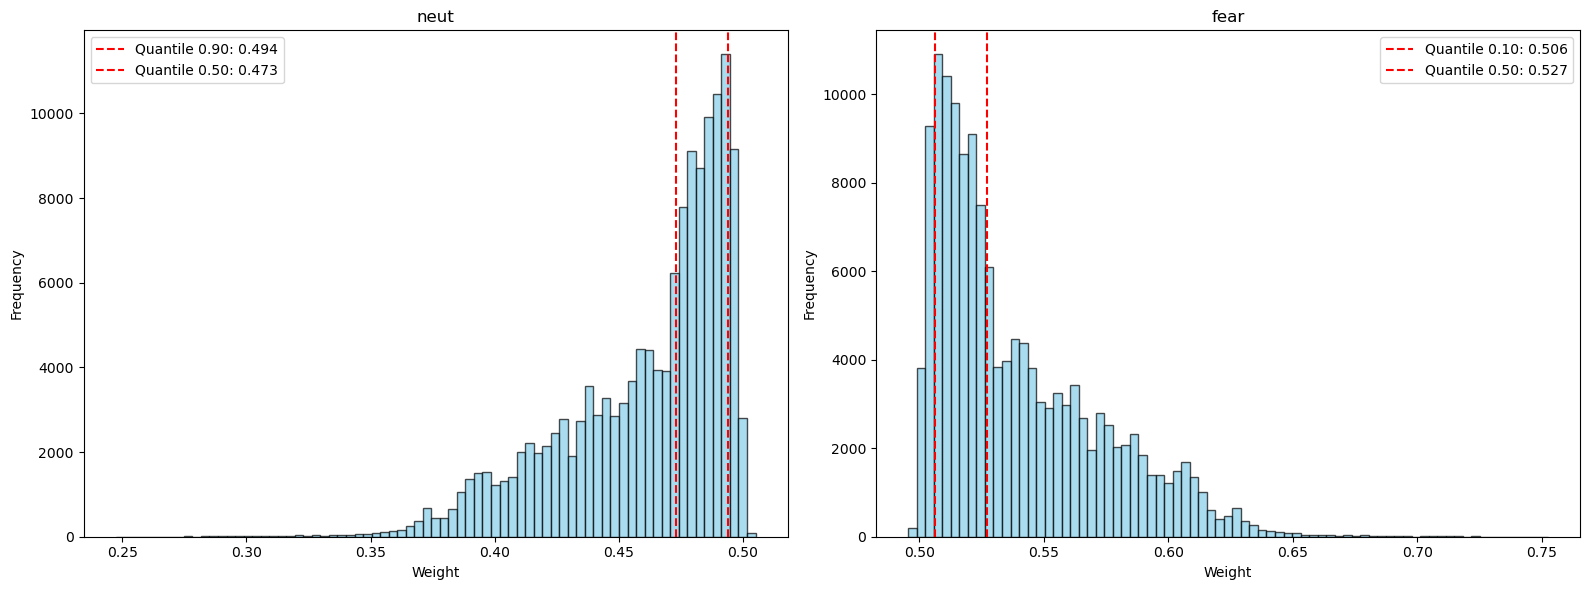

In [61]:
quantiles = [0.1, 0.5]
weight_distribution(paths.average_network_wm[0], paths.average_network_wm[1], quantiles, shift=True)
weight_distribution(paths.average_network_gambling[0], paths.average_network_gambling[1], quantiles, shift=True)
weight_distribution(paths.average_network_motor[0], paths.average_network_motor[1], quantiles, shift=True)
weight_distribution(paths.average_network_language[0], paths.average_network_language[1], quantiles, shift=True)
weight_distribution(paths.average_network_social[0], paths.average_network_social[1], quantiles, shift=True)
weight_distribution(paths.average_network_relational[0], paths.average_network_relational[1], quantiles, shift=True)
weight_distribution(paths.average_network_emotion[0], paths.average_network_emotion[1], quantiles, shift=True)

In [3]:
import networkx as nx

G_wm0, G_wm1 = (nx.from_numpy_array(np.load(paths.average_network_wm[0])), 
                nx.from_numpy_array(np.load(paths.average_network_wm[1])))
G_gambling0, G_gambling1 = (nx.from_numpy_array(np.load(paths.average_network_gambling[0])), 
                            nx.from_numpy_array(np.load(paths.average_network_gambling[1])))
G_motor0, G_motor1 = (nx.from_numpy_array(np.load(paths.average_network_motor[0])), 
                      nx.from_numpy_array(np.load(paths.average_network_motor[1])))
G_language0, G_language1 = (nx.from_numpy_array(np.load(paths.average_network_language[0])), 
                            nx.from_numpy_array(np.load(paths.average_network_language[1])))
G_social0, G_social1 = (nx.from_numpy_array(np.load(paths.average_network_social[0])), 
                        nx.from_numpy_array(np.load(paths.average_network_social[1])))
G_relational0, G_relational1 = (nx.from_numpy_array(np.load(paths.average_network_relational[0])), 
                                nx.from_numpy_array(np.load(paths.average_network_relational[1])))
G_emotion0, G_emotion1 = (nx.from_numpy_array(np.load(paths.average_network_emotion[0])), 
                          nx.from_numpy_array(np.load(paths.average_network_emotion[1])))

In [4]:
G_wm0_, G_wm1_ = (nx.from_numpy_array((np.load(paths.average_network_wm[0]) + 1) / 2), 
                nx.from_numpy_array((np.load(paths.average_network_wm[1]) + 1) / 2))
G_gambling0_, G_gambling1_ = (nx.from_numpy_array((np.load(paths.average_network_gambling[0]) + 1) / 2), 
                            nx.from_numpy_array((np.load(paths.average_network_gambling[1]) + 1) / 2))
G_motor0_, G_motor1_ = (nx.from_numpy_array((np.load(paths.average_network_motor[0]) + 1) / 2), 
                      nx.from_numpy_array((np.load(paths.average_network_motor[1]) + 1) / 2))
G_language0_, G_language1_ = (nx.from_numpy_array((np.load(paths.average_network_language[0]) + 1) / 2), 
                            nx.from_numpy_array((np.load(paths.average_network_language[1]) + 1) / 2))
G_social0_, G_social1_ = (nx.from_numpy_array((np.load(paths.average_network_social[0]) + 1) / 2), 
                        nx.from_numpy_array((np.load(paths.average_network_social[1]) + 1) / 2))
G_relational0_, G_relational1_ = (nx.from_numpy_array((np.load(paths.average_network_relational[0]) + 1) / 2), 
                                nx.from_numpy_array((np.load(paths.average_network_relational[1]) + 1) / 2))
G_emotion0_, G_emotion1_ = (nx.from_numpy_array((np.load(paths.average_network_emotion[0]) + 1) / 2), 
                          nx.from_numpy_array((np.load(paths.average_network_emotion[1]) + 1) / 2))

Интересно исследовать 1) распределение степеней (+ асортативность), 2) центральности вершин, 3) коэффициенты кластеризации (аккуратно с методом вычисления), 4) похожесть вершин, 5) похожесть на знаменитые модели, 6) определение кластеров, 7) дистанции как-нибудь 

# Распределение степеней


In [1]:
import numpy as np
import paths
import matplotlib.pyplot as plt
import networkx as nx

def read_nets(file0, file1, shift=False):
    if shift:
        Gs = [nx.from_numpy_array((np.load(file0) + 1) / 2), nx.from_numpy_array((np.load(file1) + 1) / 2)]
    else:
        Gs = [nx.from_numpy_array(np.load(file0)), nx.from_numpy_array(np.load(file1))]
    titles = [file0.split('/')[-1][:-4], file1.split('/')[-1][:-4]]
    return Gs, titles


def degree_distribution(file0, file1, bins=100, shift=False):
    """
    Изображение распределений весов ребер двух ансамблевых графов.
    
    :param file0: Файл графа первого состояния.
    :param file1: Файл графа второго состояния.
    :param bins: Число столбцов в гистограмме.
    :param shift: Нужно ли делать сдвиг весов.
    :return: 
    """
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    Gs, titles = read_nets(file0, file1, shift)
    
    for ax, G, title in zip(axes, Gs, titles):
        degrees = np.array([d for n, d in G.degree(weight='weight')]) / len(G.nodes)  
        
        # Строим гистограмму распределения весов
        ax.hist(degrees, bins=bins, alpha=0.7, color='skyblue', edgecolor='black')
        ax.set_xlabel('Degree')
        # ax.set_ylabel('Value')
        ax.set_title(title)
    
    plt.tight_layout()
    plt.show()

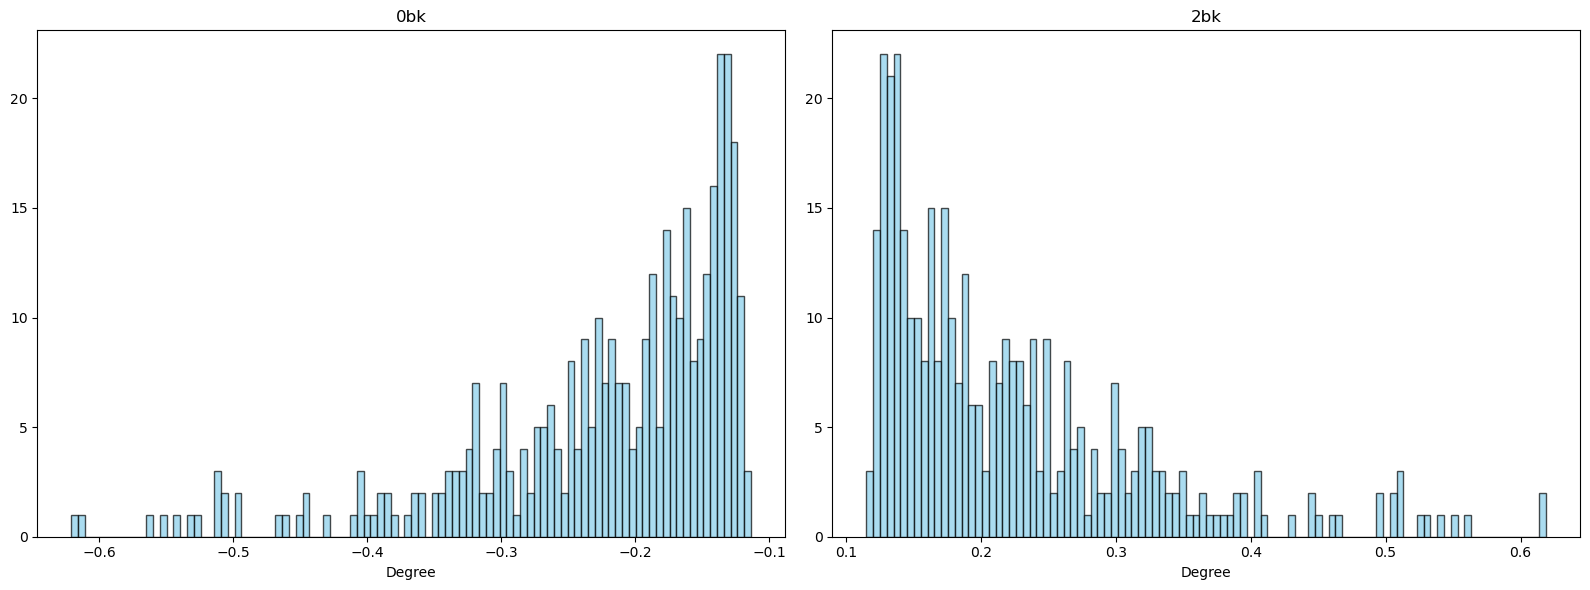

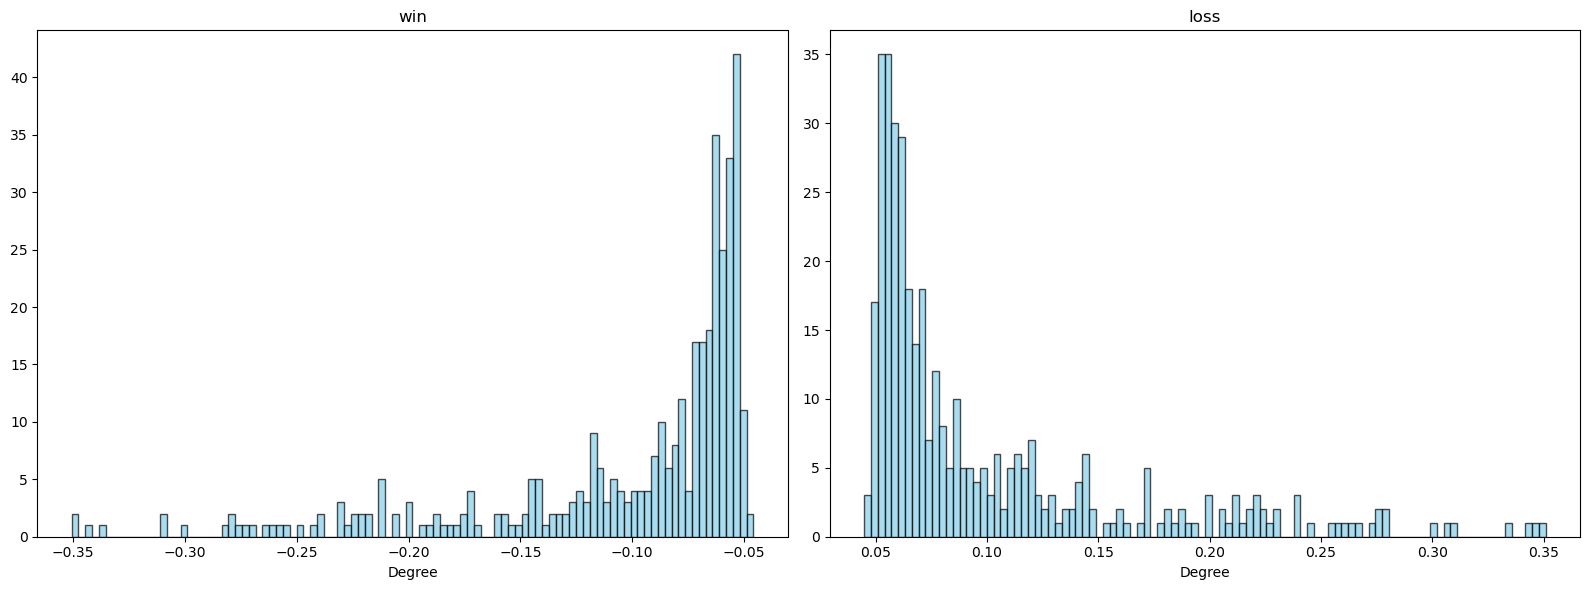

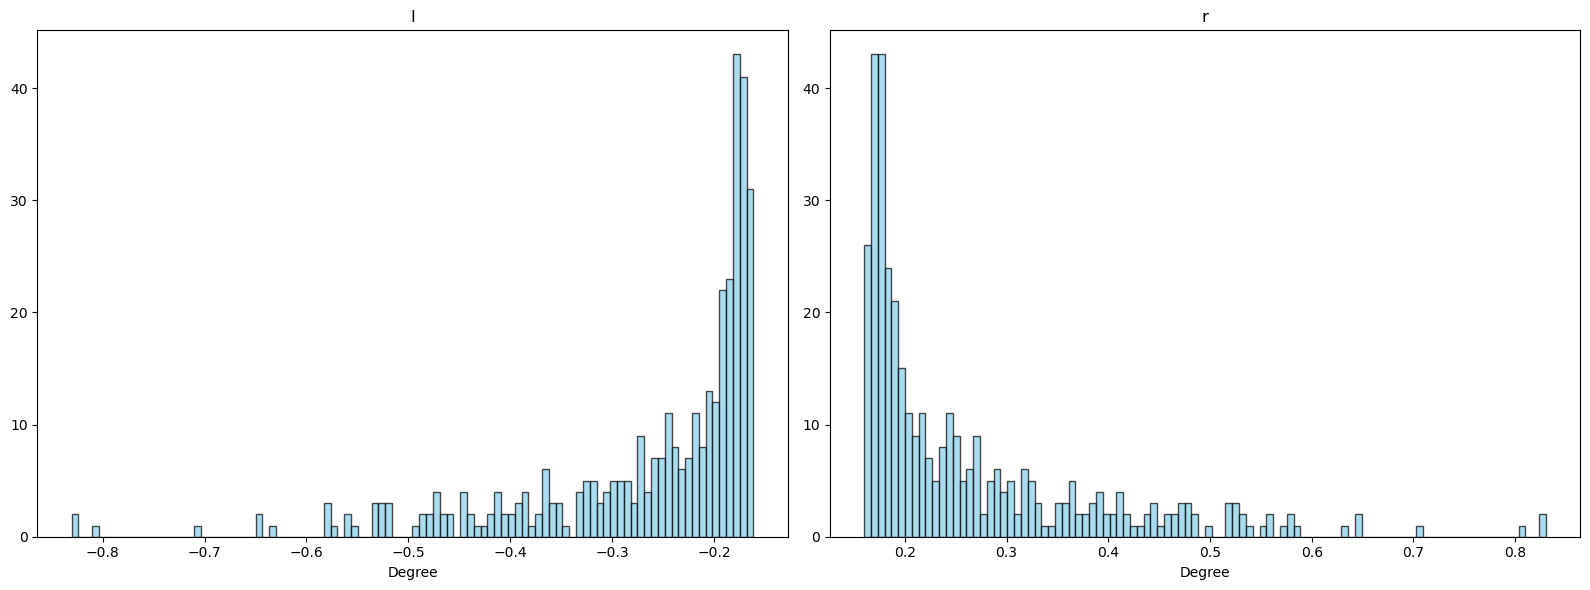

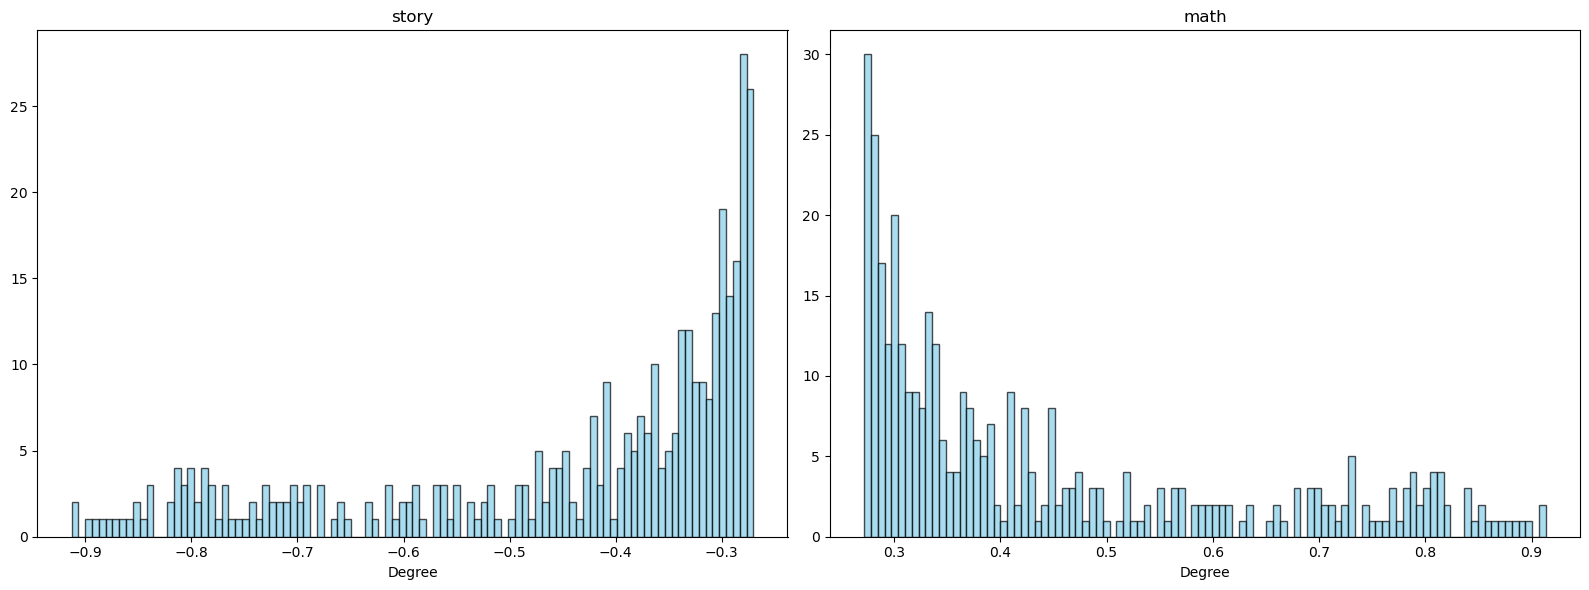

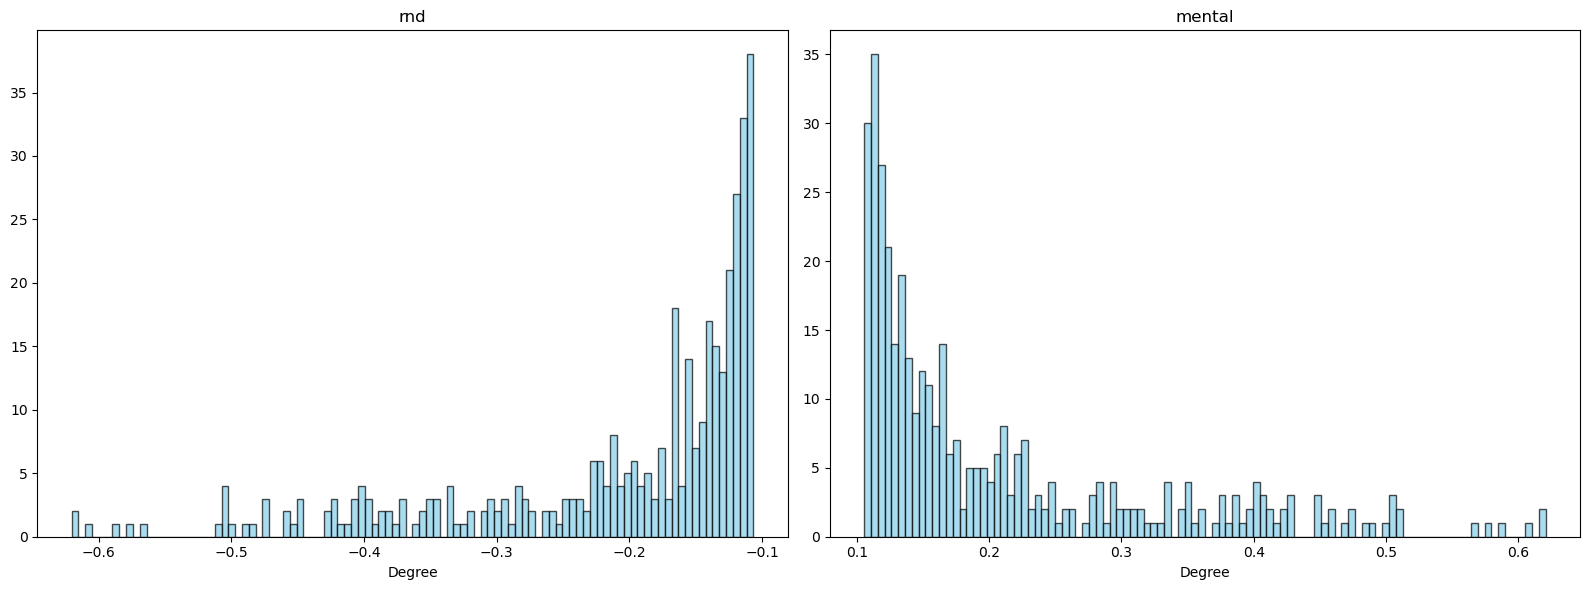

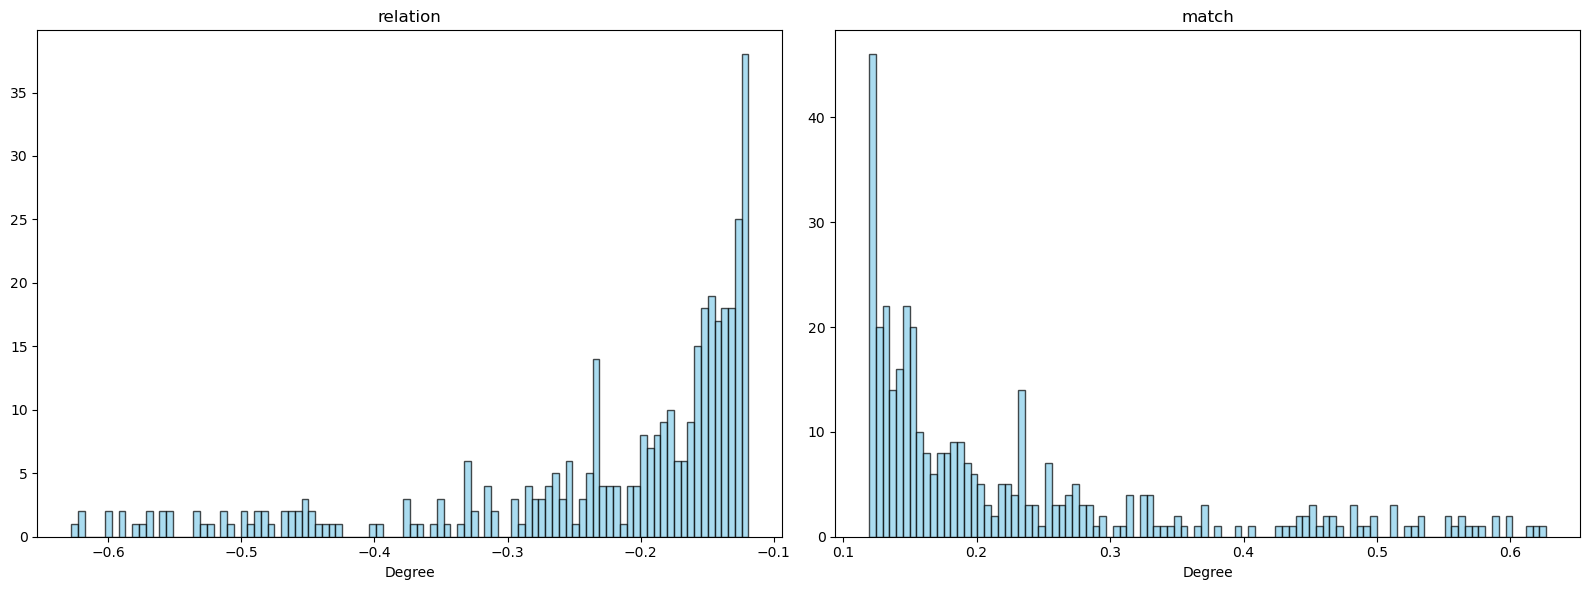

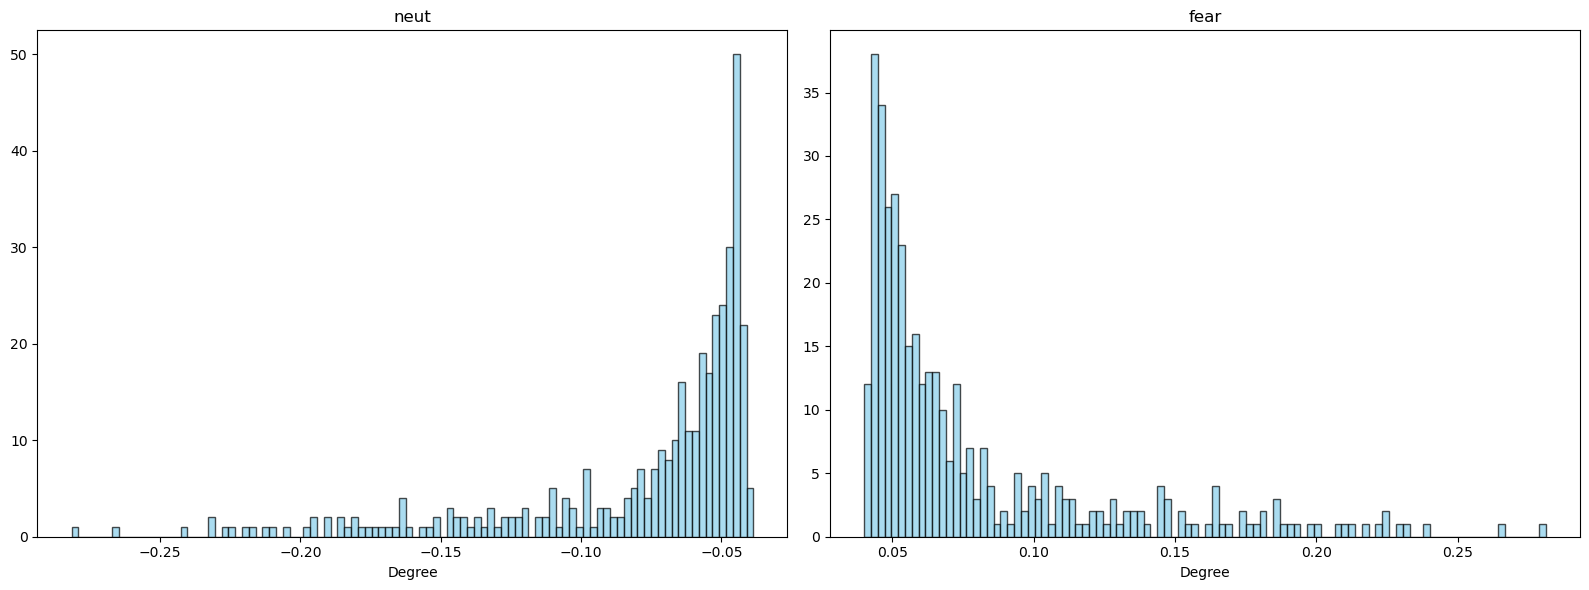

In [50]:
degree_distribution(paths.average_network_wm[0], paths.average_network_wm[1])
degree_distribution(paths.average_network_gambling[0], paths.average_network_gambling[1])
degree_distribution(paths.average_network_motor[0], paths.average_network_motor[1])
degree_distribution(paths.average_network_language[0], paths.average_network_language[1])
degree_distribution(paths.average_network_social[0], paths.average_network_social[1])
degree_distribution(paths.average_network_relational[0], paths.average_network_relational[1])
degree_distribution(paths.average_network_emotion[0], paths.average_network_emotion[1])

Сравним распределение степеней со степенным законом. С учетом отрицательных вершин половины графов, будем исследовать абсолютные значения вершин.

In [23]:
import numpy as np
import powerlaw
import matplotlib.pyplot as plt

def read_net(file, shift=False):
    if shift:
        G = nx.from_numpy_array((np.load(file) + 1) / 2)
    else:
        G = nx.from_numpy_array(np.load(file))
    title = file.split('/')[-1][:-4]
    return G, title

def powerlaw_check(file):
    # Пример: массив данных. Замените этот пример своими данными.
    G, title = read_net(file)
    degrees = np.array([abs(d) for n, d in G.degree(weight='weight')]) / len(G.nodes)  
    
    print(title)
    # Выполним оценку параметров степенного закона
    fit = powerlaw.Fit(degrees)
    
    # Вывод оцененных параметров
    print("Оценка параметра степени (alpha):", fit.alpha)
    print("Минимальное значение (xmin):", fit.xmin)
    print("KS статистика:", fit.power_law.KS())
    
    # Построим график эмпирического распределения и подгонку степенного закона
    fig = fit.plot_cdf(label='Эмпирические данные')
    fit.power_law.plot_cdf(ax=fig, color='r', linestyle='--', label='Степенной закон')
    fit.exponential.plot_cdf(ax=fig, color='g', linestyle='--', label='Экспоненциальное распределение')
    plt.xlabel('x')
    plt.ylabel('CDF')
    plt.title(title)
    plt.legend()
    plt.show()

0bk
Calculating best minimal value for power law fit
Оценка параметра степени (alpha): 5.091310506007751
Минимальное значение (xmin): 0.291751568683729
KS статистика: 0.0657024184165047


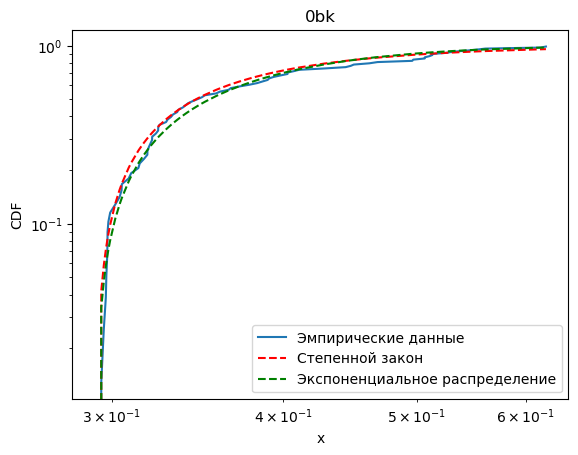

2bk
Calculating best minimal value for power law fit
Оценка параметра степени (alpha): 5.0677415422640815
Минимальное значение (xmin): 0.29123382277594934
KS статистика: 0.06820713561187791


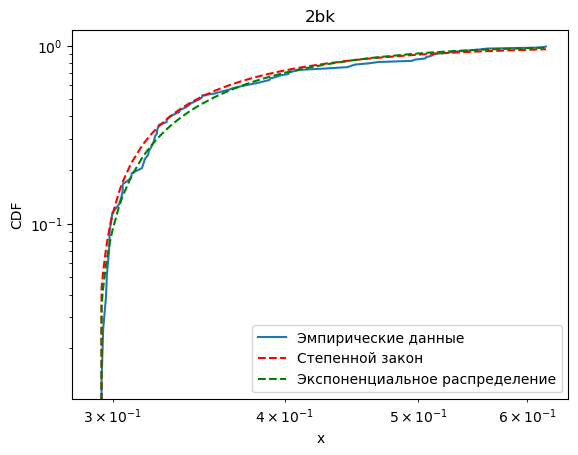

win
Calculating best minimal value for power law fit
Оценка параметра степени (alpha): 2.815192141578555
Минимальное значение (xmin): 0.05027474298577602
KS статистика: 0.05040969245279203


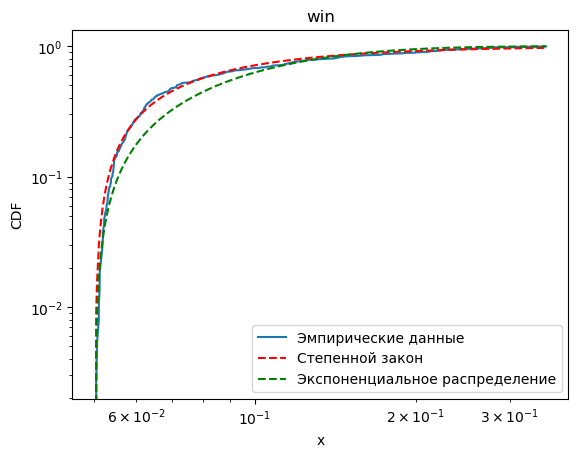

loss
Calculating best minimal value for power law fit
Оценка параметра степени (alpha): 2.7415809629430288
Минимальное значение (xmin): 0.048487261021628744
KS статистика: 0.048310514096657875


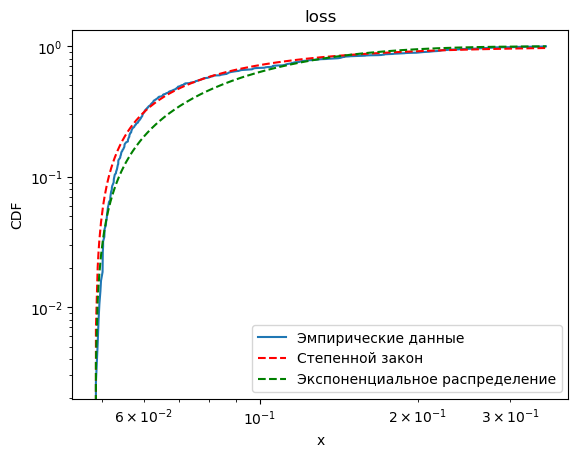

l
Calculating best minimal value for power law fit
Оценка параметра степени (alpha): 3.3153182348840065
Минимальное значение (xmin): 0.17667729293243092
KS статистика: 0.05759620774881136


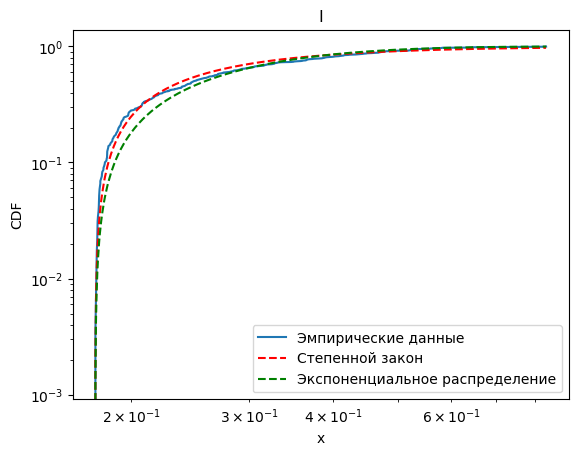

r
Calculating best minimal value for power law fit
Оценка параметра степени (alpha): 3.394506001128427
Минимальное значение (xmin): 0.15980607977400146
KS статистика: 0.05175028225100631


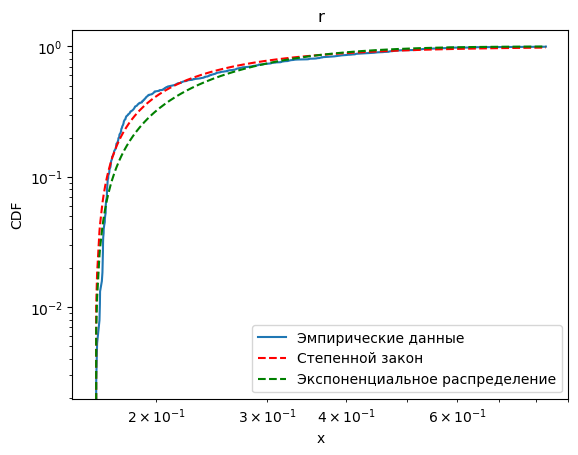

story
Calculating best minimal value for power law fit
Оценка параметра степени (alpha): 3.3719681469633254
Минимальное значение (xmin): 0.27021631692166553
KS статистика: 0.0680967755330193


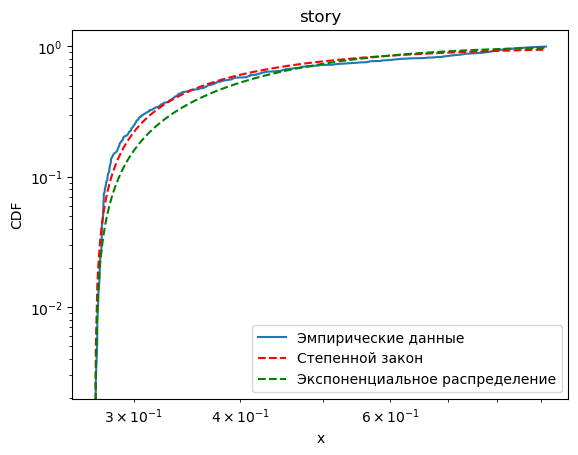

math
Calculating best minimal value for power law fit
Оценка параметра степени (alpha): 3.391840421093144
Минимальное значение (xmin): 0.2718859946298591
KS статистика: 0.06907628696364243


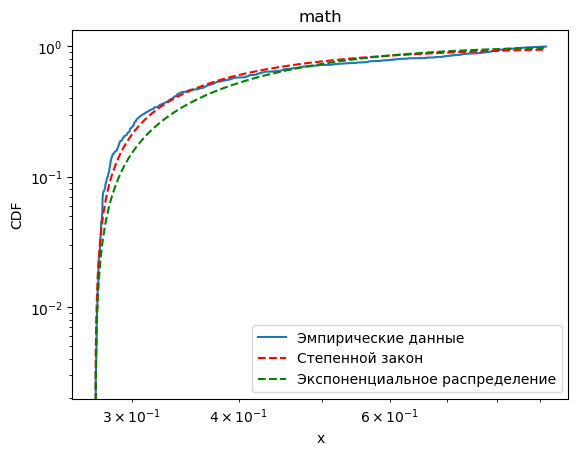

rnd
Calculating best minimal value for power law fit
Оценка параметра степени (alpha): 2.867928837207982
Минимальное значение (xmin): 0.10667746584262658
KS статистика: 0.05696872507183537


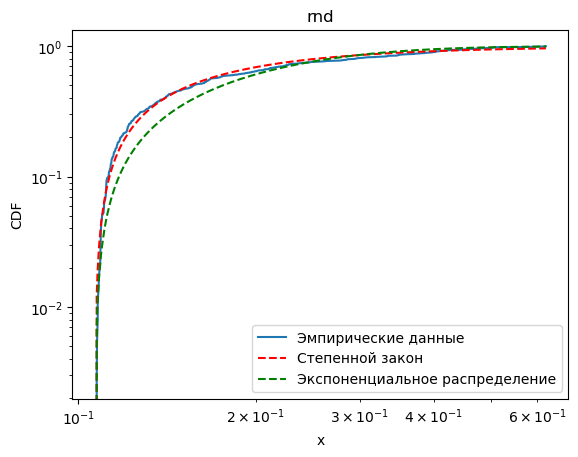

mental
Calculating best minimal value for power law fit
Оценка параметра степени (alpha): 2.8364769782937382
Минимальное значение (xmin): 0.10549242221631162
KS статистика: 0.054822453761533274


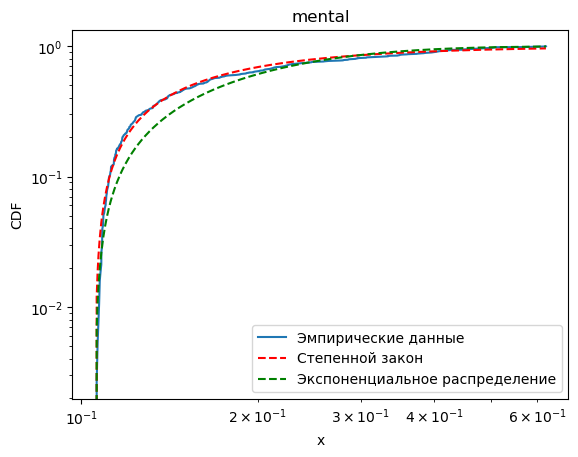

relation
Calculating best minimal value for power law fit
Оценка параметра степени (alpha): 2.930357770554644
Минимальное значение (xmin): 0.11912616235683217
KS статистика: 0.059135060421933505


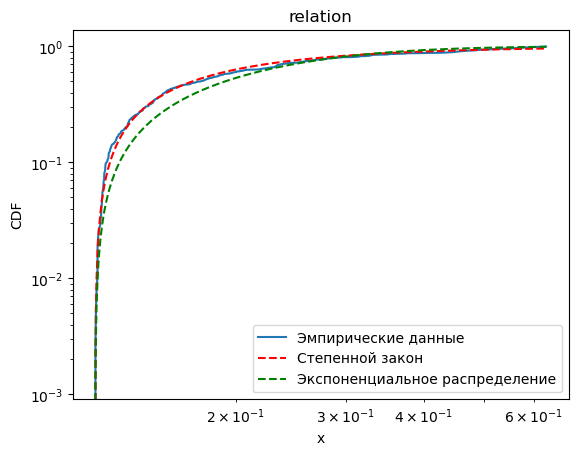

match
Calculating best minimal value for power law fit
Оценка параметра степени (alpha): 2.956279190036774
Минимальное значение (xmin): 0.11940038695345563
KS статистика: 0.05571872613141515


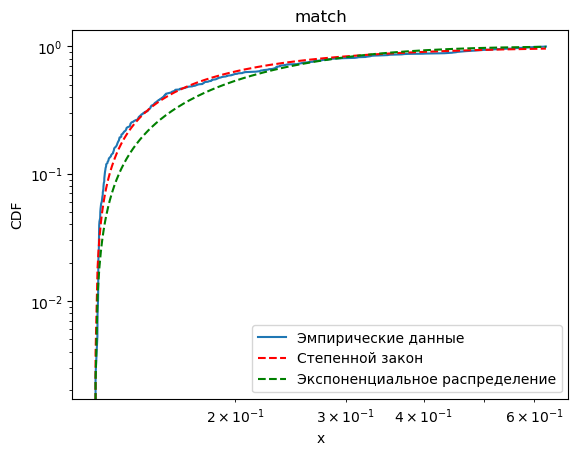

neut
Calculating best minimal value for power law fit
Оценка параметра степени (alpha): 2.946117634701746
Минимальное значение (xmin): 0.041288198371447794
KS статистика: 0.044180681575689884


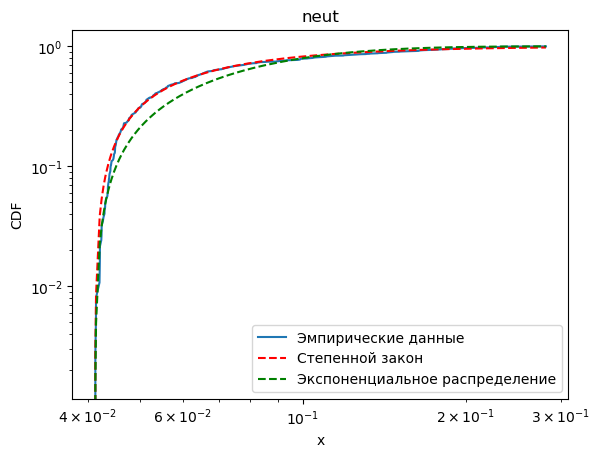

fear
Calculating best minimal value for power law fit
Оценка параметра степени (alpha): 2.9371925651080213
Минимальное значение (xmin): 0.041480994961052994
KS статистика: 0.03860979360814076


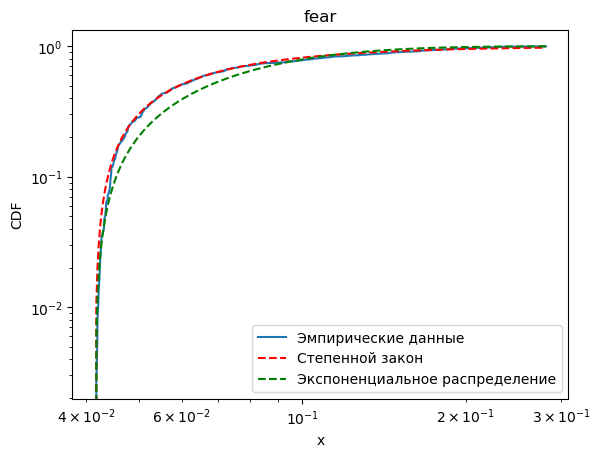

In [24]:
powerlaw_check(paths.average_network_wm[0])
powerlaw_check(paths.average_network_wm[1])
powerlaw_check(paths.average_network_gambling[0])
powerlaw_check(paths.average_network_gambling[1])
powerlaw_check(paths.average_network_motor[0])
powerlaw_check(paths.average_network_motor[1])
powerlaw_check(paths.average_network_language[0])
powerlaw_check(paths.average_network_language[1])
powerlaw_check(paths.average_network_social[0])
powerlaw_check(paths.average_network_social[1])
powerlaw_check(paths.average_network_relational[0])
powerlaw_check(paths.average_network_relational[1])
powerlaw_check(paths.average_network_emotion[0])
powerlaw_check(paths.average_network_emotion[1])

С уровнем значимости 0.05 гипотеза о том, что степени вершин распределены в соответствии со степенным законом у некоторых данных. 

In [32]:
def degree_correlation_matrix(file0, file1, bins=50, shift=False):
    """
    Изображает матрицы корреляций степеней для двух графов.
    
    Для каждого графа:
      - Вычисляются степени узлов (нормированные на число узлов).
      - Для каждого ребра извлекается пара степеней соединённых узлов.
      - По парам степеней строится 2D-гистограмма (heatmap), где оси соответствуют степеням двух узлов.
    
    Параметры:
      :param file0: Файл графа первого состояния.
      :param file1: Файл графа второго состояния.
      :param bins: Число бинов (ячейки) по каждой оси гистограммы.
      :param shift: Применять ли сдвиг весов (если требуется).
    """
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    Gs, titles = read_nets(file0, file1, shift)
    
    for ax, G, title in zip(axes, Gs, titles):
        # Вычисляем степени для всех узлов (нормированные на общее число узлов)
        degrees = {n: d/len(G.nodes) for n, d in G.degree(weight='weight')}  
        
        # Собираем пары степеней для каждого ребра
        d1_list = []
        d2_list = []
        for u, v in G.edges():
            d1_list.append(degrees[u])
            d2_list.append(degrees[v])
        d1 = np.array(d1_list)
        d2 = np.array(d2_list)
        
        # Вычисляем 2D-гистограмму по парам степеней.
        # Диапазон выставляем от -1 до 1 (так как степени лежат в этом интервале)
        H, xedges, yedges = np.histogram2d(d1, d2, bins=bins, range=[[-1, 1], [-1, 1]])
        
        # Отображаем тепловую карту. Транспонирование H.T обеспечивает правильную ориентацию.
        im = ax.imshow(H.T, origin='lower', extent=[-1, 1, -1, 1],
                       cmap='Blues', aspect='auto')
        ax.set_xlabel('Степень узла u')
        ax.set_ylabel('Степень узла v')
        ax.set_title(title)
        fig.colorbar(im, ax=ax, label='Частота ребер')
    
    plt.tight_layout()
    plt.show()


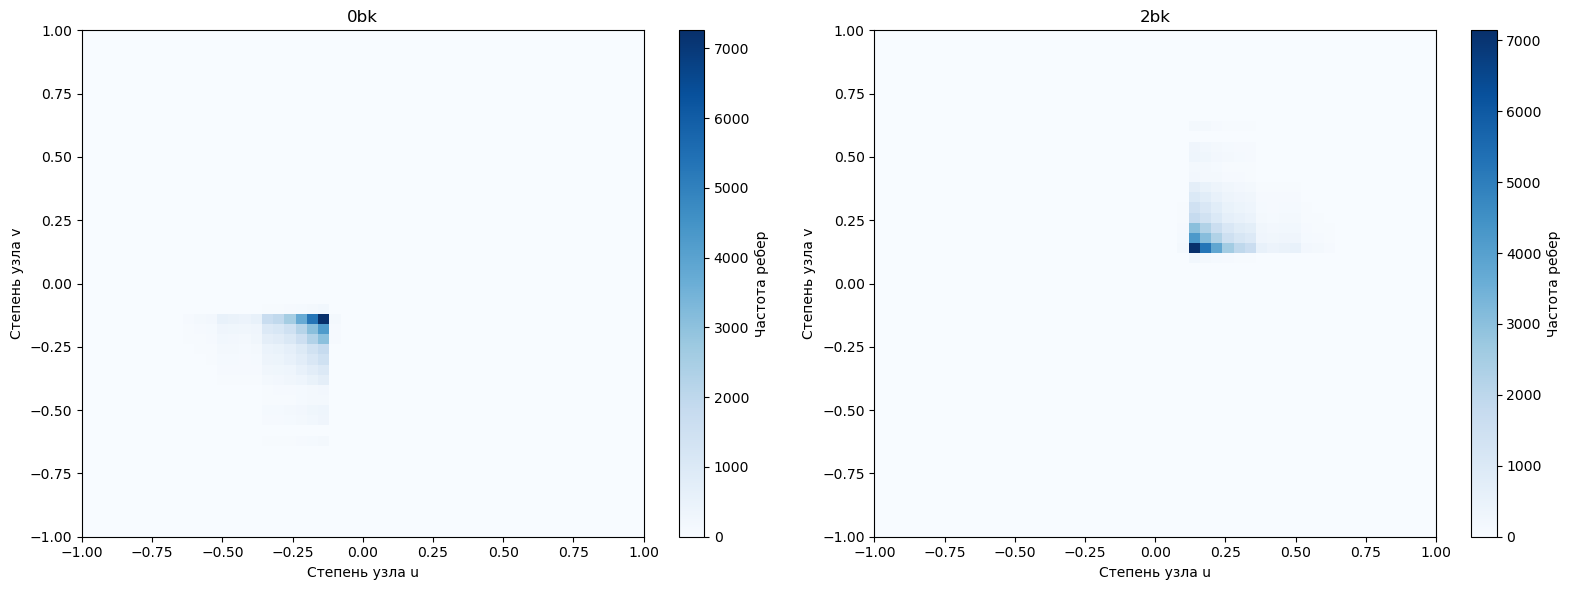

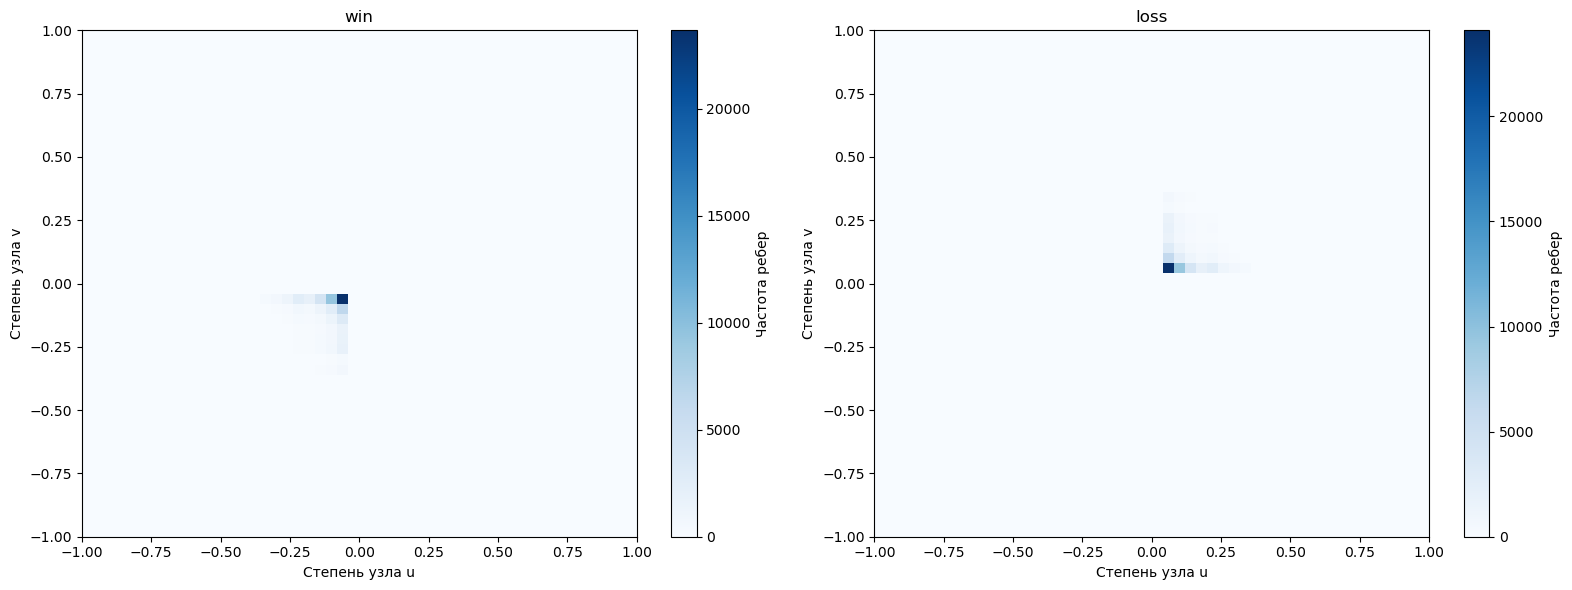

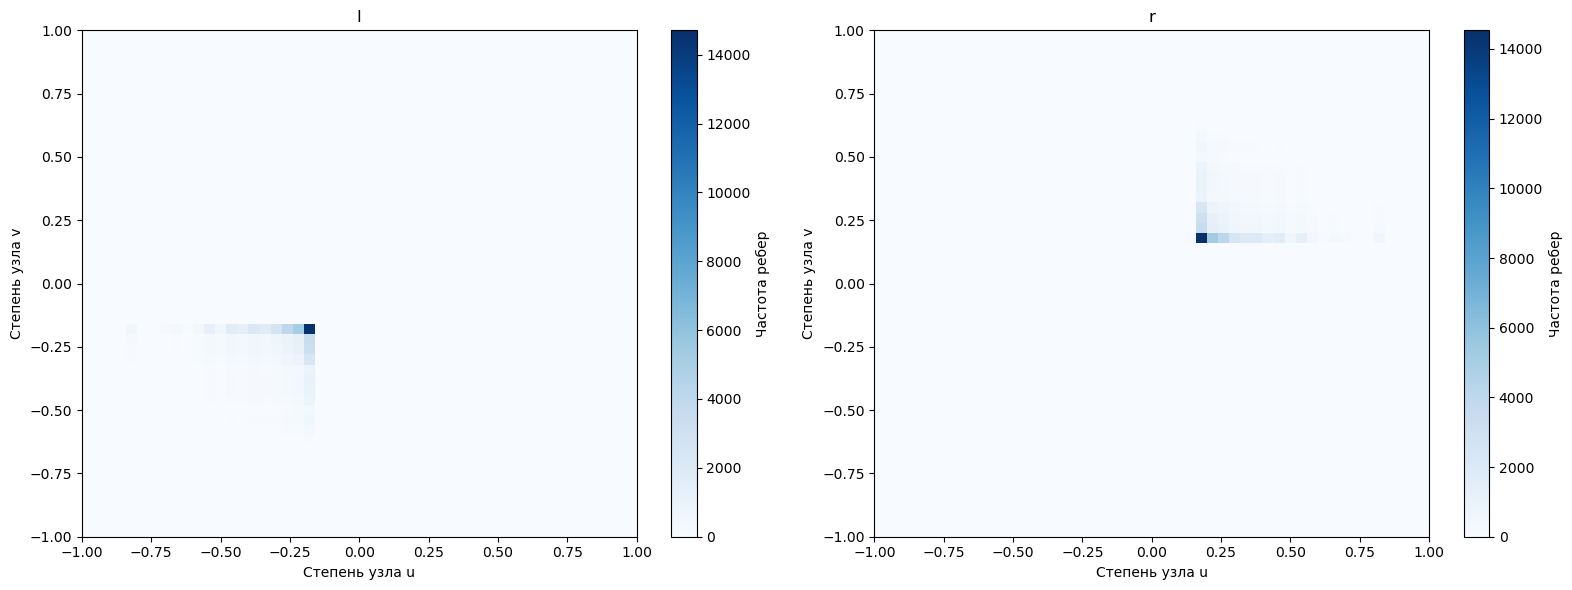

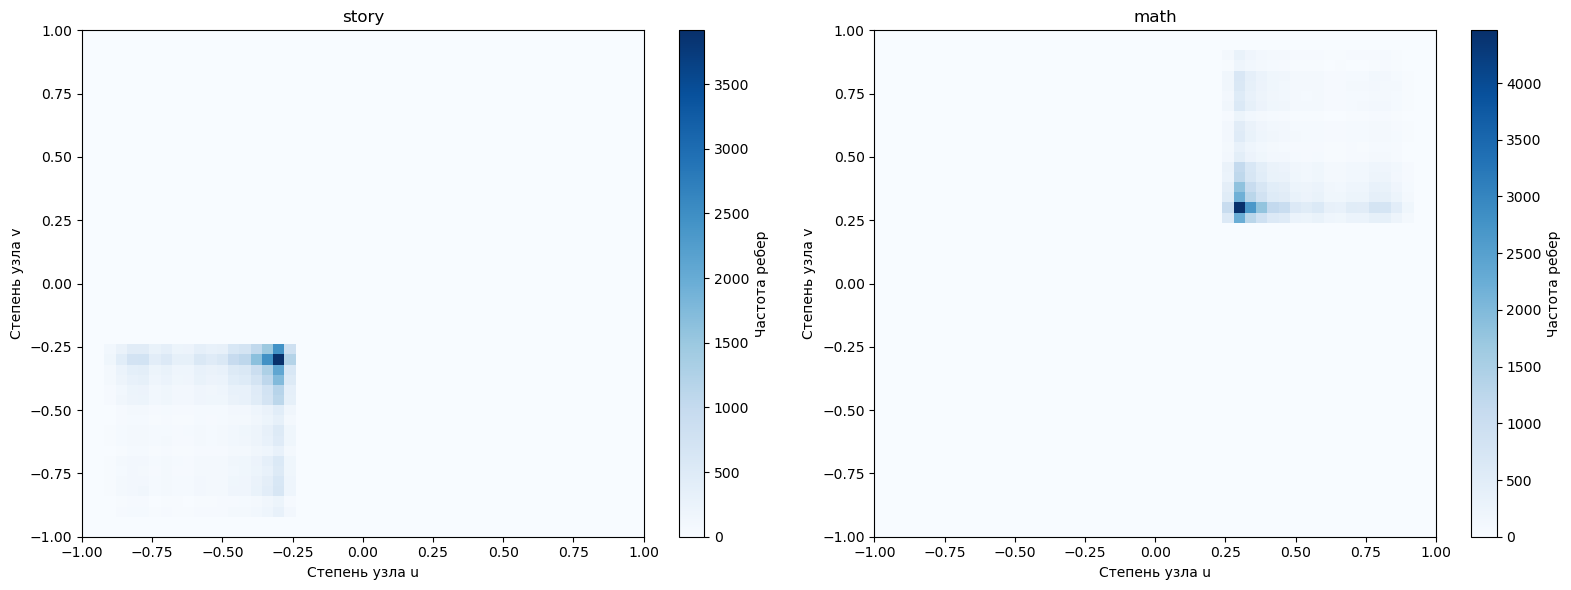

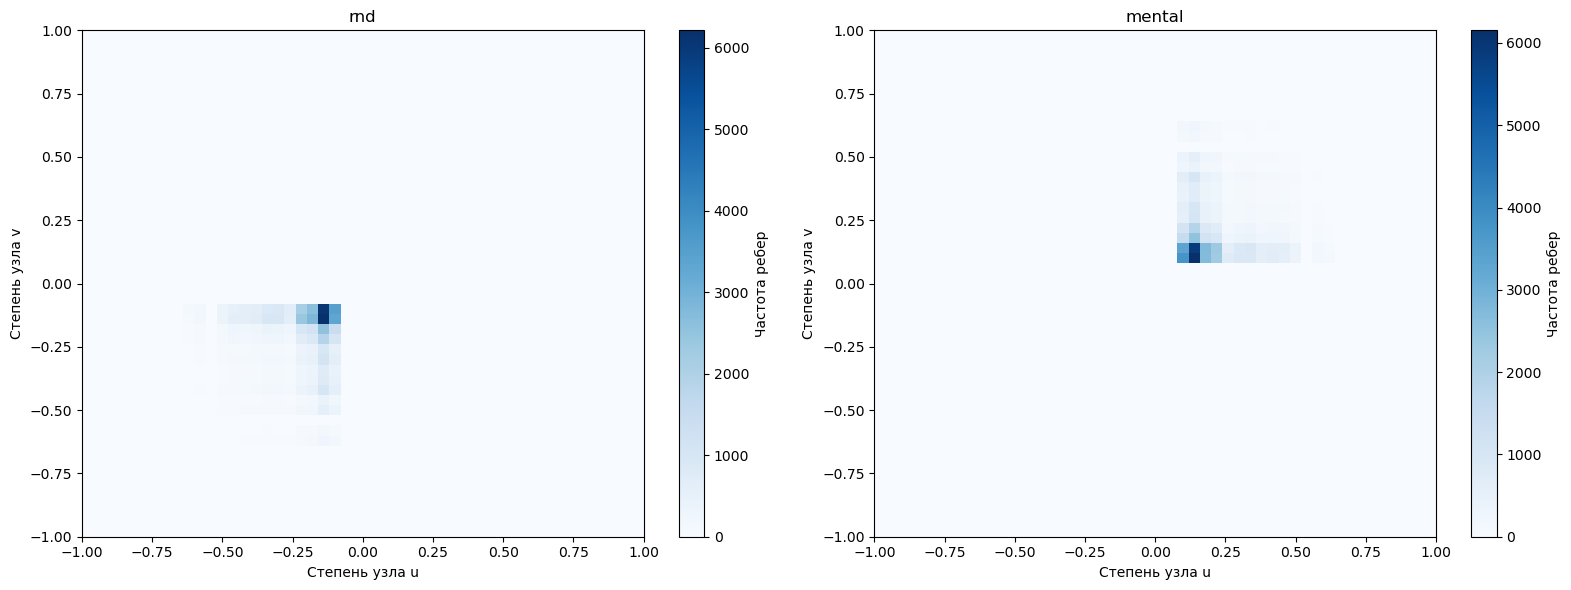

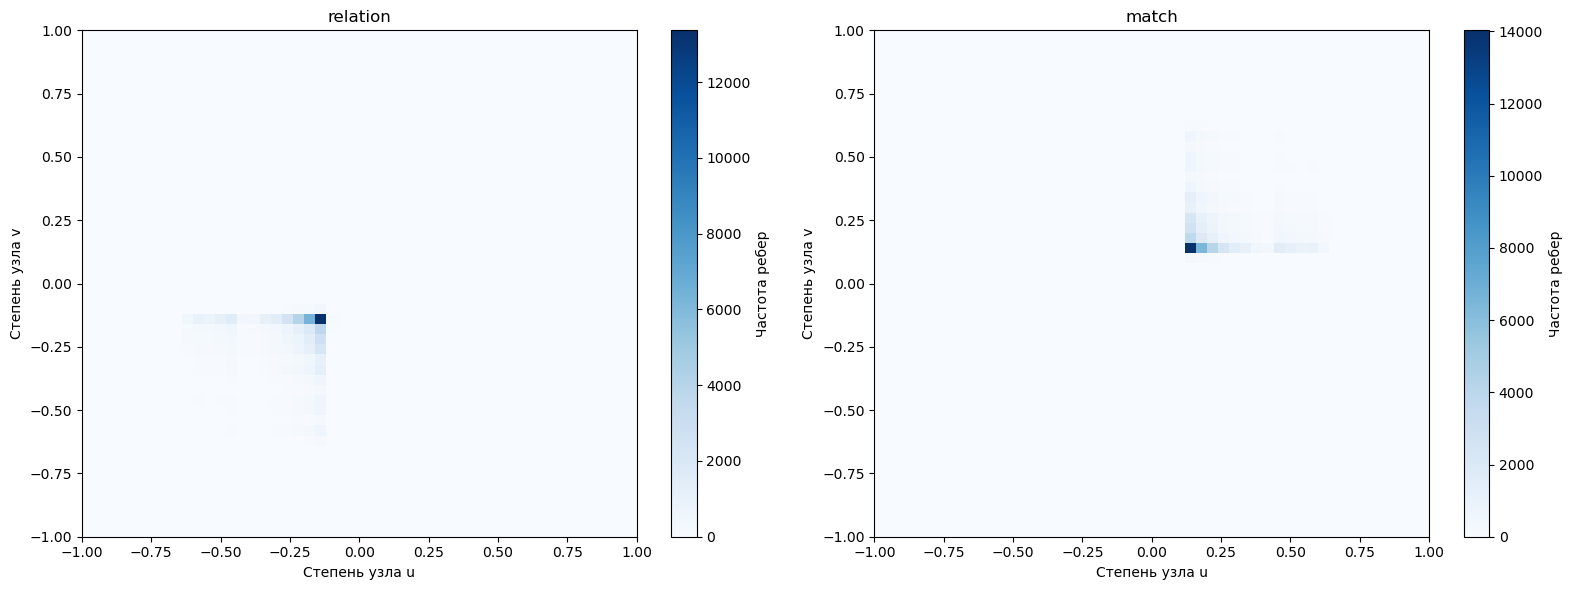

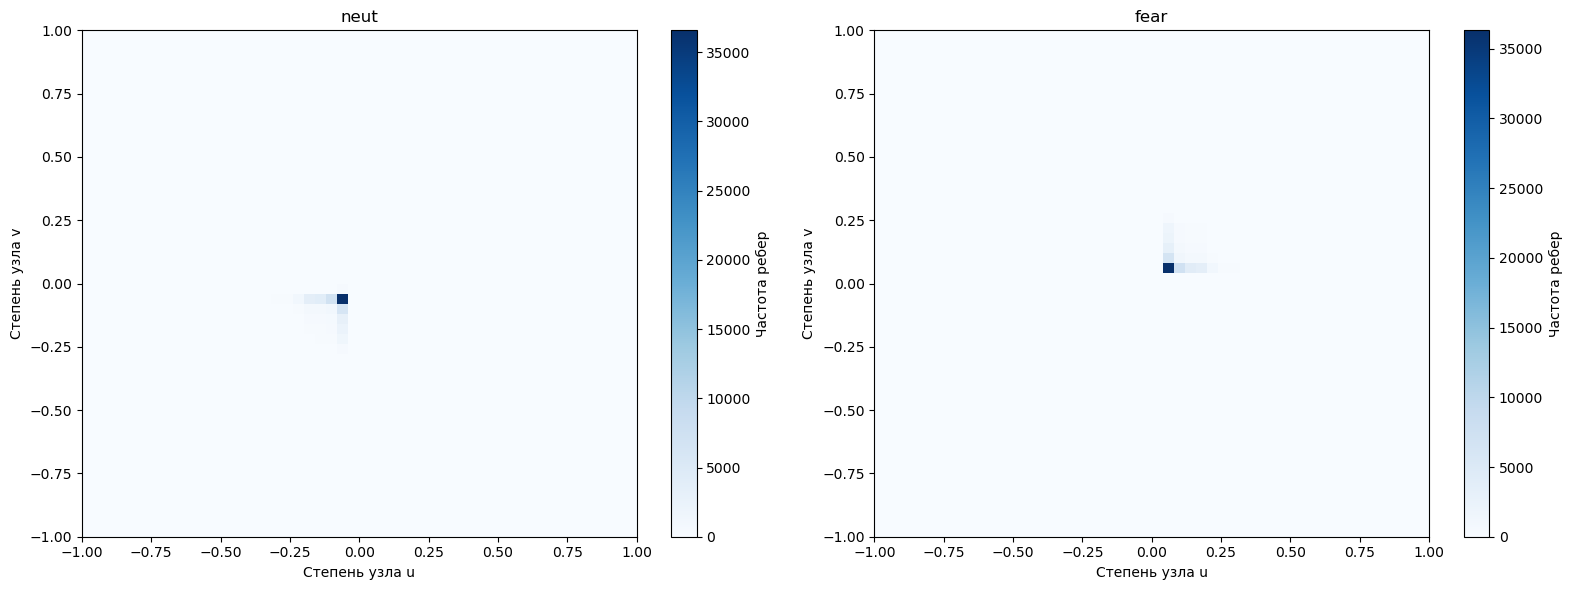

In [33]:
degree_correlation_matrix(paths.average_network_wm[0], paths.average_network_wm[1])
degree_correlation_matrix(paths.average_network_gambling[0], paths.average_network_gambling[1])
degree_correlation_matrix(paths.average_network_motor[0], paths.average_network_motor[1])
degree_correlation_matrix(paths.average_network_language[0], paths.average_network_language[1])
degree_correlation_matrix(paths.average_network_social[0], paths.average_network_social[1])
degree_correlation_matrix(paths.average_network_relational[0], paths.average_network_relational[1])
degree_correlation_matrix(paths.average_network_emotion[0], paths.average_network_emotion[1])

Ну, граф полный... Узлов со слабыми степенями много.... 

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import scipy.stats

def degree_correlation_function(file0, file1, shift=False):
    """
    Вычисляет функцию корреляции степеней для двух графов и строит scatter plot:
      - Для каждого узла вычисляется его нормализованная степень (с учётом весов ребер).
      - Для каждого узла считается средняя степень его соседей.
      - На графике по оси X откладывается степень узла, по оси Y – средняя степень соседей.
      - На scatter plot накладывается линия линейной регрессии.
    """
    Gs, titles = read_nets(file0, file1, shift)
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    for ax, G, title in zip(axes, Gs, titles):
        # Вычисляем нормализованные степени узлов (значение может быть отрицательным)
        degrees = {n: d/len(G.nodes) for n, d in G.degree(weight='weight')}
        
        # Для каждого узла вычисляем среднюю степень его соседей (если у узла есть соседи)
        node_degrees = []
        neighbor_avg_degrees = []
        
        for node in G.nodes():
            neighbors = list(G.neighbors(node))
            avg_neighbor_degree = np.mean([degrees[neigh] for neigh in neighbors])
            node_degrees.append(degrees[node])
            neighbor_avg_degrees.append(avg_neighbor_degree)
        
        node_degrees = np.array(node_degrees)
        neighbor_avg_degrees = np.array(neighbor_avg_degrees)
        
        # Строим scatter plot точек: (степень узла, средняя степень его соседей)
        ax.scatter(node_degrees, neighbor_avg_degrees, color='blue', alpha=0.6, label='Точки данных')
        
        # Выполняем линейную регрессию для нахождения линии тренда
        slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(node_degrees, neighbor_avg_degrees)
        
        # Создаём массив значений по оси X для линии регрессии
        x_vals = np.linspace(np.min(node_degrees), np.max(node_degrees), 100)
        y_vals = intercept + slope * x_vals
        ax.plot(x_vals, y_vals, color='red', linestyle='--',
                label=f'Линия регрессии\nslope={slope:.2f}')
        
        ax.set_title(title)
        ax.set_xlabel('Степень узла')
        ax.set_ylabel('Средняя степень соседей')
        ax.legend()
    
    plt.tight_layout()
    plt.show()

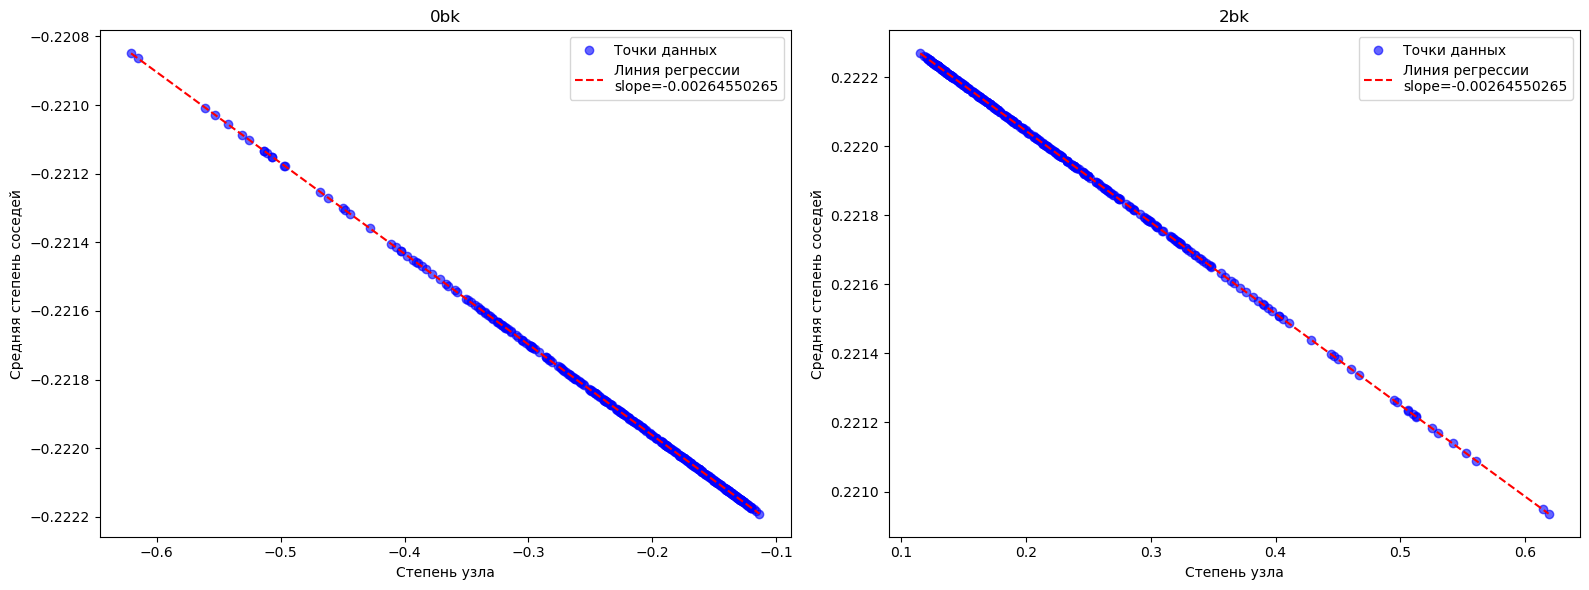

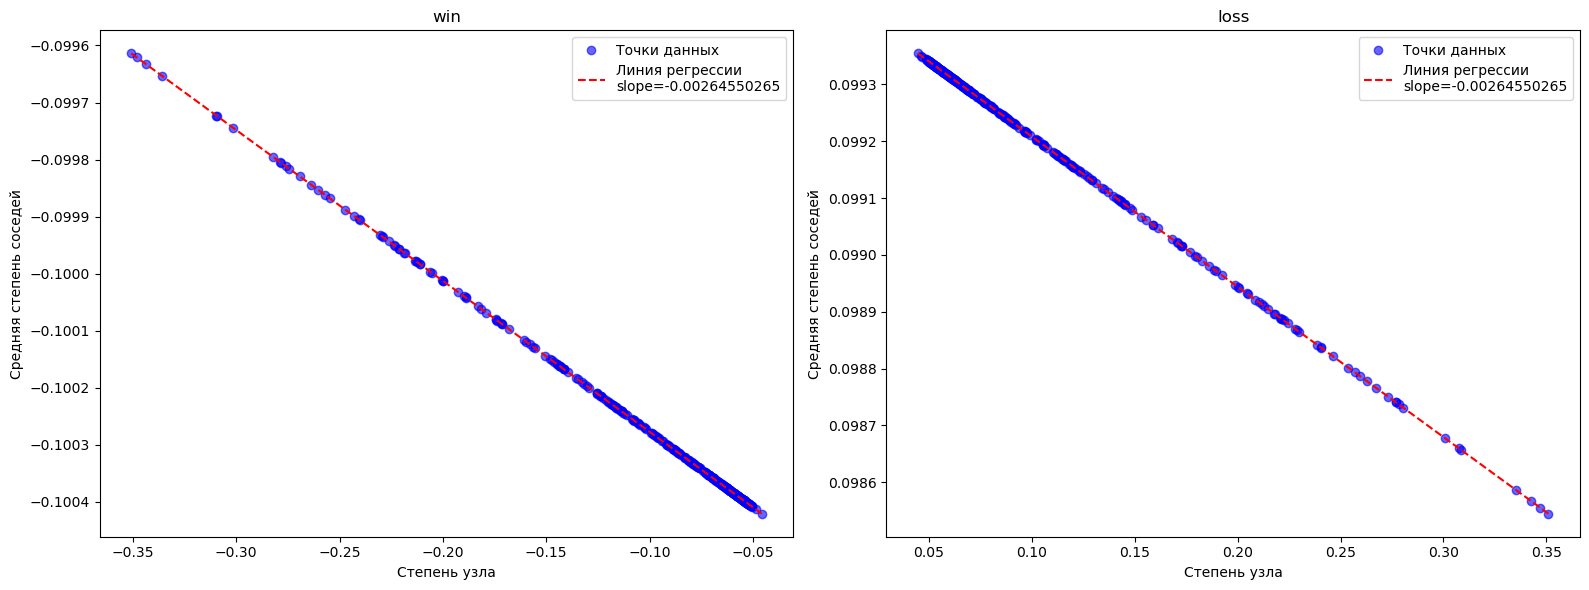

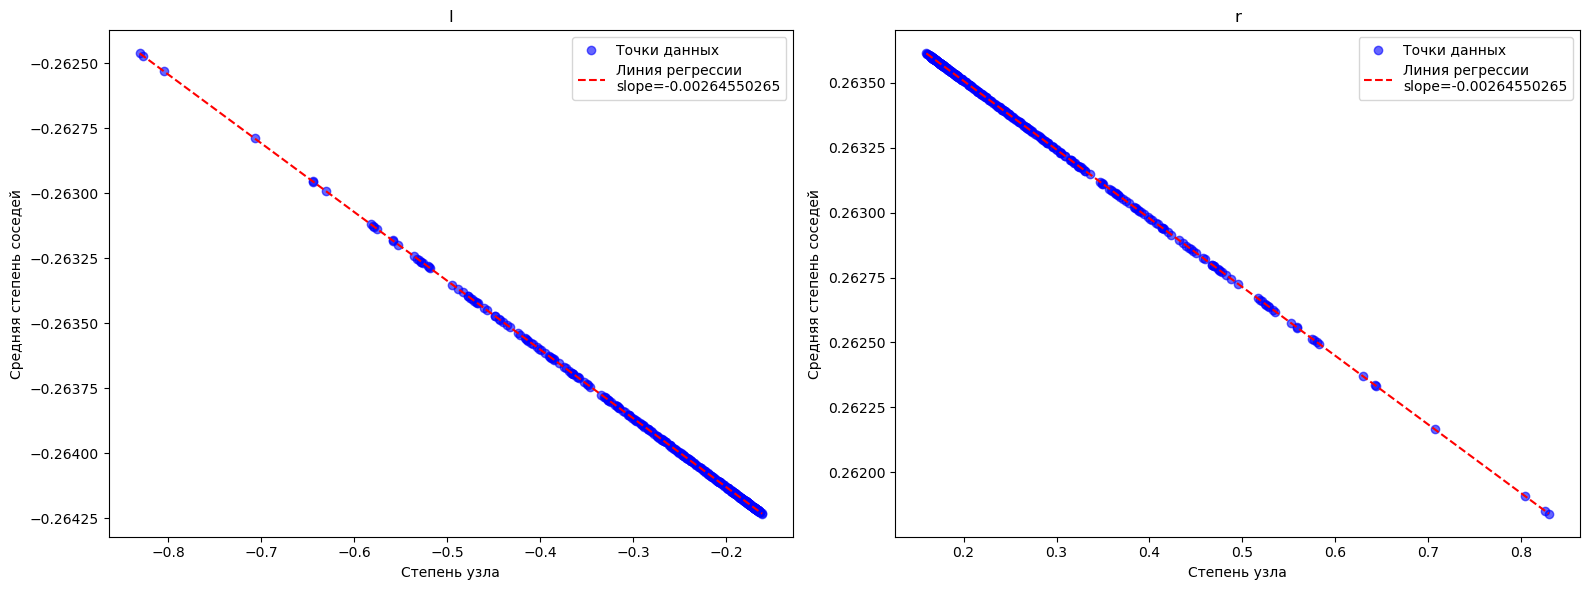

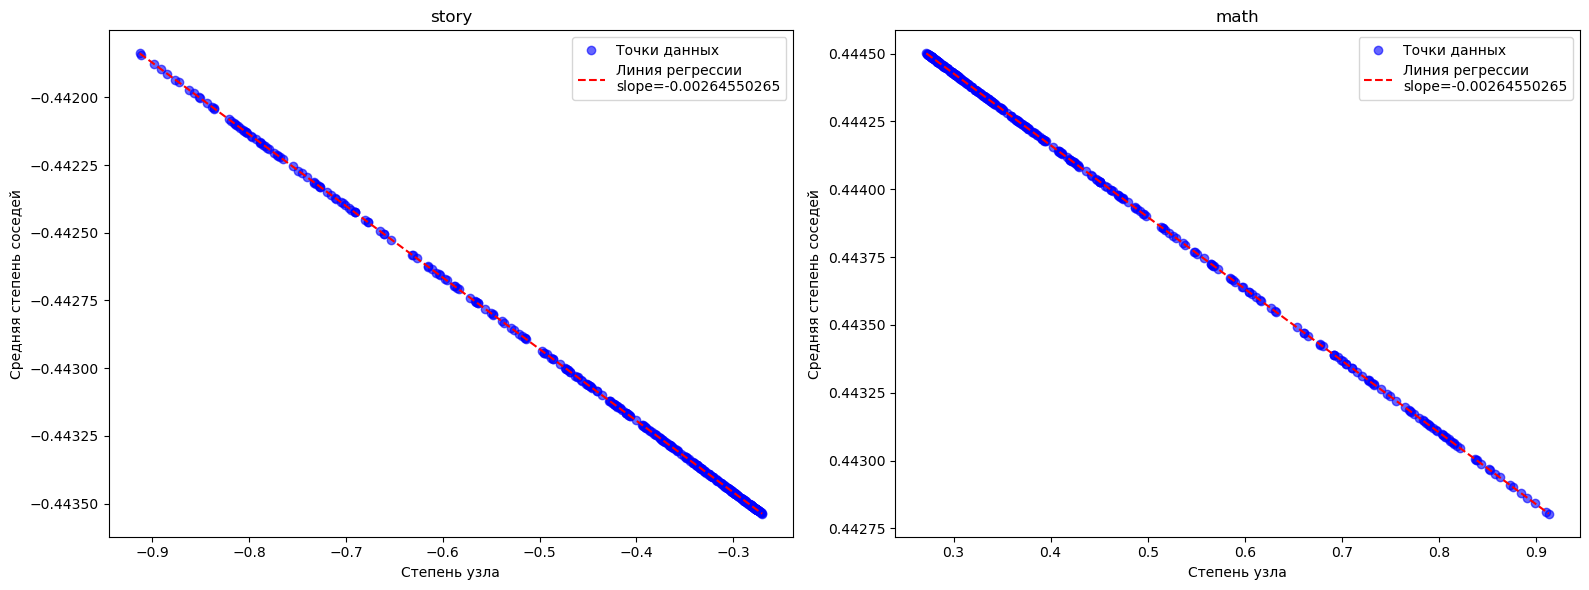

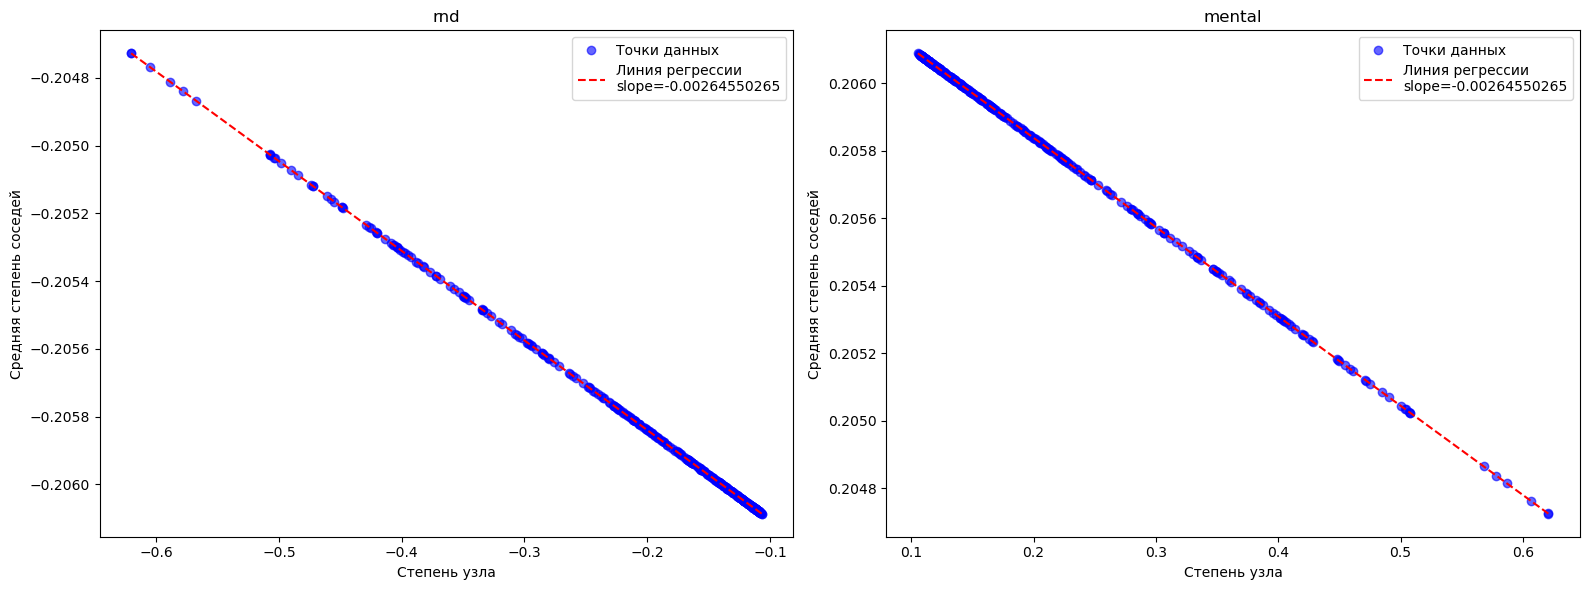

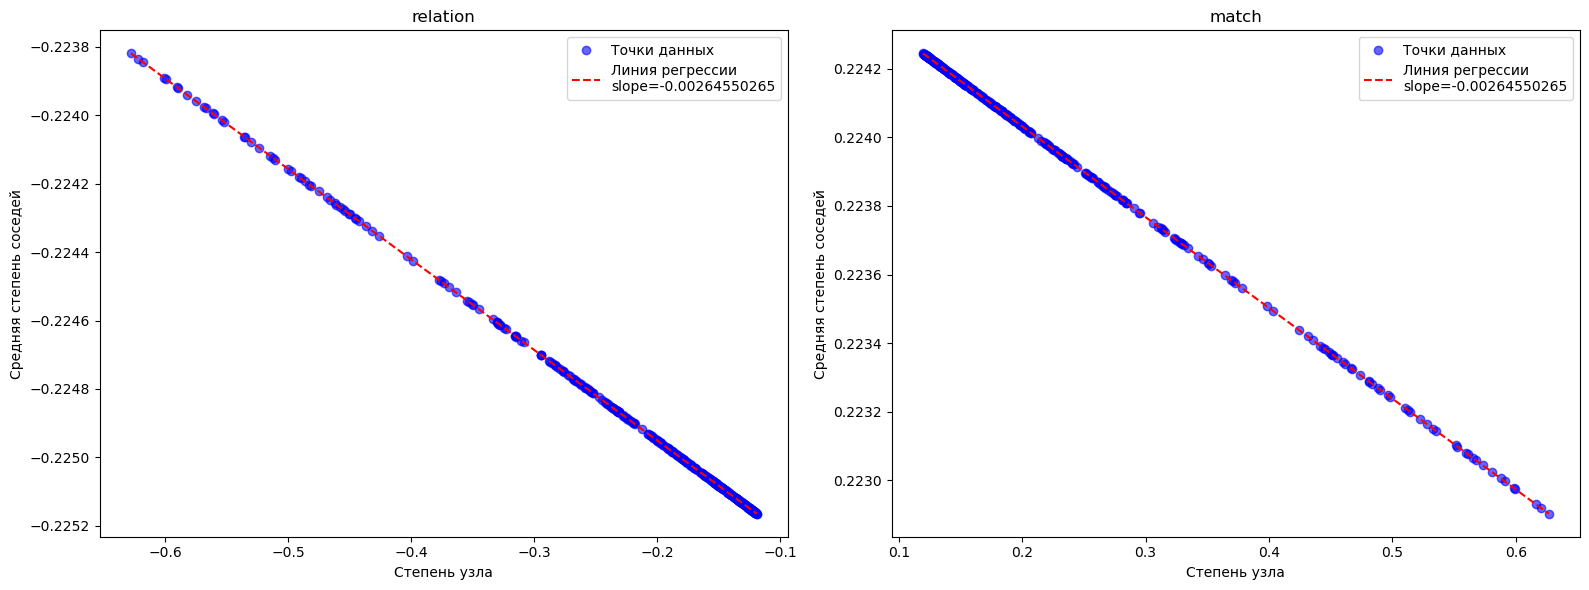

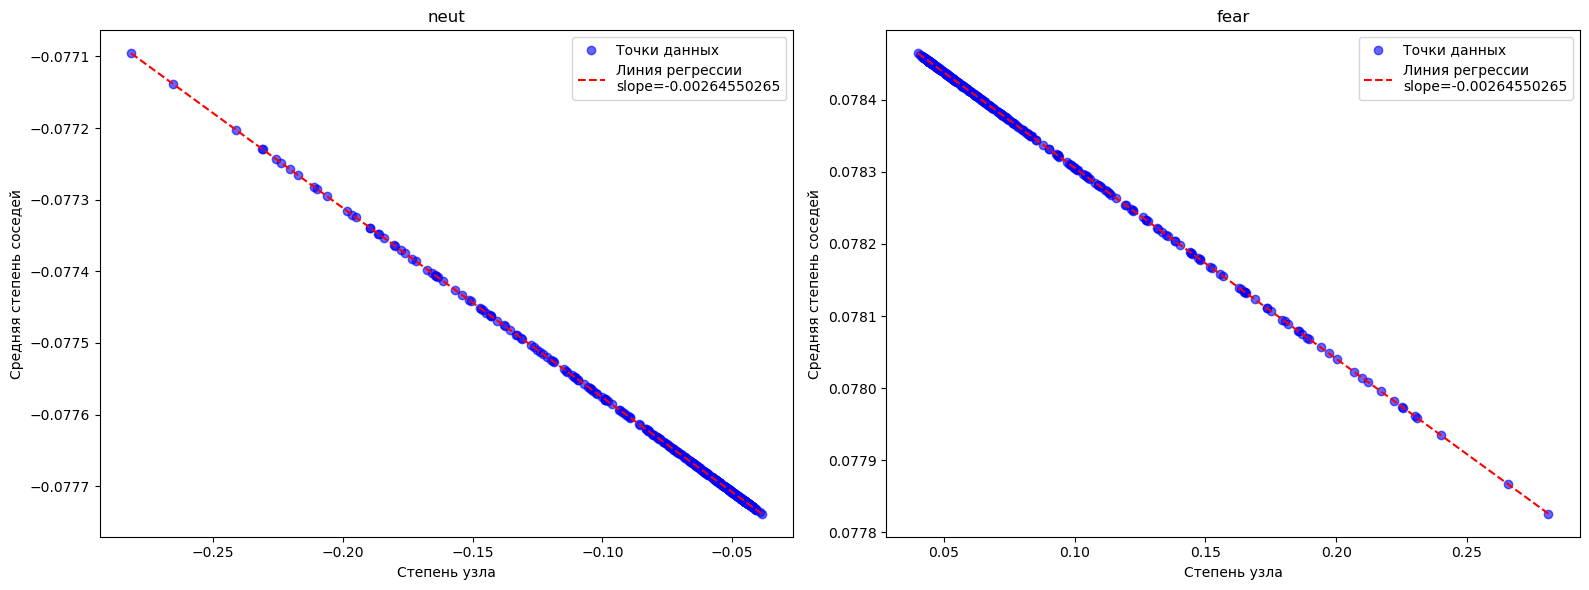

In [48]:
degree_correlation_function(paths.average_network_wm[0], paths.average_network_wm[1])
degree_correlation_function(paths.average_network_gambling[0], paths.average_network_gambling[1])
degree_correlation_function(paths.average_network_motor[0], paths.average_network_motor[1])
degree_correlation_function(paths.average_network_language[0], paths.average_network_language[1])
degree_correlation_function(paths.average_network_social[0], paths.average_network_social[1])
degree_correlation_function(paths.average_network_relational[0], paths.average_network_relational[1])
degree_correlation_function(paths.average_network_emotion[0], paths.average_network_emotion[1])

Наклон почти нулевой. Ну это логично, граф то полный, лол. Средний вес соседа для любой вершины почти всегда одинаковый....  

Сравнивать со случайными взвешенными графами, думаю, смысла нет...